# Inclass Material: Data Wrangling and Visualization

* _This notebook was made based on main materials_: `3_Data_Wrangling_and_Visualization.ipynb`.
* _Version: Apollo - December 2024_.
* _Instructor_: Saskia Dwi Ulfah.

## Training Objectives

- _Python Reproducible Environment_
- _Working with Multi-Index DataFrames_
- _Reshaping DataFrame_
- _Visual Data Exploratory_
- _Using Group By Effectively_

----

***START OF DAY 1***

# Refresher: P4DA (Week 1) and EDA (Week 2)

2 minggu sebelumnya, kita sudah mempelajari fungsi-fungsi untuk melakukan inspeksi awal dan analisis lanjut pada data:

**_Python for Data Analyst: Data Inspection_**
- `.head()` dan `.tail()`: menampilkan data teratas dan data terbawah.
- `.describe()`: menampilkan nilai statistik pada data.
- `.shape` and `.size`: menampilkan ukuran data.
- `.axes`: menampilkan nama baris/indeks dan kolom.
- `.dtypes`: menampilkan tipe data setiap kolom.
- `.loc` dan `.iloc`: melakukan _indexing/subsetting/slicing_.

**_Exploraroty Data Analysis: Diagnostic and Exploratory_**
- _Tables_.
- _Cross-Tables and Aggregates_.
- _Using `aggfunc` for Aggregate Functions_.
- _Pivot Tables_.
- _Working with DateTime_.
- _Working with Categorical Data_.
- _Duplicates and Missing Value Treatment_.

---

# Python Reproducible Environment

Pada awal pembelajaran P4DA, kita sudah berkenalan dengan istilah ***virtual environment***.

> ***Virtual environment*** adalah *environment* terisolasi yang memungkinkan setiap *environment* memiliki instalasi dan versi *package* yang khusus dan berbeda. 

Kita bisa menggunakan *virtual environment* saat memiliki banyak projek di mana setiap projek membutuhkan *package* dengan versi yang spesifik. Dengan menggunakan *virtual environment*, kita bisa menjalankan berbagai macam projek pada satu *device* yang sama tanpa perlu khawatir akan adanya permasalahan yang timbul karena perbedaan versi *package*.

## ✨Exporting Requirements✨

Mbak Dwi adalah seorang *lead data scientist* di sebuah *company*. Mbak Dwi memulai sebuah projek analisis perbandingan saham di *device*-nya dan membuat *virtual environment* khusus untuk projek tersebut. Ia juga meng-*install* berbagai *package* yang digunakan untuk projek tersebut.

> ❓ Mbak Dwi ingin membagikan proyek analisis data tersebut kepada Mas Arkana, anggota timnya. Bagaimana cara projek tersebut dapat berjalan di *device* Mas Arkana tanpa menimbulkan *error*?

> 💡 Mbak Dwi dapat membuat *file* ✨`requirements.txt`✨ yang berisikan *package* yang sudah ada di-*environment*-nya dan menyerahkan *file* tersebut kepada Mas Arkana.

Lihat pada folder `/material_3_dwv_main`, Anda akan menemukan *file* `requirements.txt` yang isinya seperti ini:
```
matplotlib==3.7.1
numpy==1.24.2
pandas==2.0.0
yfinance==0.2.18
...
```
Untuk membuat `requirements.txt`, Mbak Dwi akan melakukan langkah-langkah berikut:

1. Buka terminal.

2. Aktifkan *environment*.
    ```
    conda activate <ENV_NAME>
    ```

    Apabila belum ada, maka perlu membuat *environment* baru:
    ```
    conda create -n <ENV_NAME> python=<PYTHON_VERSION>
    ```

3. Navigasikan *path* ke *folder* tempat di mana *file* `requirements.txt` ingin disimpan.
    ```
    cd <PATH_TO_REQUIREMENTS_FOLDER>
    ```

4. *Export environment*: membuat daftar *packages* beserta versinya.
    ```
    pip list --format=freeze > requirements.txt
    ```

    >💡 **Note**: Anda dapat menyimpan *file* dengan nama lain. Namun sebagai **konvensi**, biasa digunakan penamaan `requirements.txt`.

## ✨Importing Requirements✨

Setelah mendapatkan *file* `requirements.txt` dari Mbak Dwi, Mas Arkana dapat melakukan langkah berikut.

1. Buka terminal.

2. Aktifkan *environment* yang ingin digunakan.
    ```
    conda activate <ENV_NAME>
    ```

    Apabila belum ada, maka perlu membuat *environment* baru:
    ```
    conda create -n <ENV_NAME> python=<PYTHON_VERSION>
    ```

3. Navigasikan *path* ke *folder* di mana *file* `requirements.txt` berada.
    ```
    cd <PATH_TO_REQUIREMENTS>
    ```

4. Instalasi *package* yang terdapat pada *requirements.txt*.
    ```
    pip install -r requirements.txt
    ```

---

# Working with Multi-Index DataFrames

Pada pembelajaran kali ini, kita akan menggunakan *library* `yfinance` untuk mengakses data saham yang tersedia pada [Yahoo! Finance](https://finance.yahoo.com/). Penarikan data menggunakan _library_ `yfinance` membutuhkan koneksi internet.

> 📌 Dokumentasi *library* `yfinance`: https://pypi.org/project/yfinance/

In [69]:
# package untuk manipulasi data
import pandas as pd
# package untuk import data
import yfinance as data
# package untuk visualisasi data
import matplotlib.pyplot as plt

# atur format angka untuk float
pd.set_option('display.float_format', '{:,.3f}'.format)

In [70]:
# perusahaan yang akan ditarik datanya: BRI, Adaro, Telkom
symbol = ['BBRI.JK', 'ADRO.JK', 'TLKM.JK']
# range tanggal untuk mengambil data saham
start_date = '2018-01-01' 
end_date = '2023-12-31' # (exclusive) 

# penarikan data
stock = data.download(tickers = symbol, start = start_date, end = end_date)
stock.columns.names = ['Attributes', 'Symbols']

# 5 record teratas
stock.head()

[*********************100%%**********************]  3 of 3 completed


Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

**Penjelasan `Symbols`:**

- `ADRO.JK`: PT Adaro Energy Indonesia Tbk.
- `BBRI.JK`: PT Bank Rakyat Indonesia Tbk.
- `TLKM.JK`: PT Telkom Indonesia Tbk.

**Deskripsi Data:**

- `Date`: tanggal dalam format `yyyy-mm-dd`.
- `High`: nilai saham **tertinggi** di hari tersebut.
- `Low`: nilai saham **terendah** di hari tersebut.
- `Open`: nilai saham saat **_trading hours_ dibuka** di hari tersebut.
- `Close`: nilai saham saat **_trading hours_ ditutup** di hari tersebut.
- `Adj Close`: nilai `Close` yang telah disesuaikan _stock split_ dan pembagian dividen. 
- `Volume`: jumlah lembar saham yang berpindah tangan di hari tersebut (jumlah transaksi jual beli).

## ✨Saving DataFrame to File✨

Sebelumnya, kita sudah mempelajari bagaimana cara membaca data yang berformat `.csv` menggunakan fungsi `pd.read_csv()`. 

> ❓ Mbak Dwi harus menghadiri rapat di luar kantor. Ia meminta Mas Arkana untuk melanjutkan pembersihan dan analisis data yang telah ia mulai sebelumnya. Bagaimana cara Mbak Dwi dapat menyimpan *dataframe* hasil analisisnya menjadi sebuah *file* yang dapat digunakan oleh Mas Arkana?

> 📌 Menggunakan fungsi `.to_csv()` untuk data yang berformat `.csv`.

In [71]:
# simpan data format CSV 
# simpan ke folder data_cache
# simpan file dengan nama stock_csv.csv

stock.to_csv('data_cache/stock_csv.csv')

In [72]:
# read data

stock_loaded = pd.read_csv('data_cache/stock_csv.csv')
stock_loaded.head()

,Attributes,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,Symbols,ADRO.JK,BBRI.JK,TLKM.JK,ADRO.JK,BBRI.JK,TLKM.JK,ADRO.JK,BBRI.JK,TLKM.JK,ADRO.JK,BBRI.JK,TLKM.JK,ADRO.JK,BBRI.JK,TLKM.JK,ADRO.JK,BBRI.JK,TLKM.JK
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,587.30029296875,2503.331787109375,3430.840576171875,1860.0,3309.03369140625,4440.0,1860.0,3309.03369140625,4440.0,1860.0,3309.03369140625,4440.0,1860.0,3309.03369140625,4440.0,0.0,0,0.0
3,2018-01-02,593.615478515625,2496.454833984375,3407.65869140625,1880.0,3299.943115234375,4410.0,1900.0,3381.759765625,4460.0,1865.0,3281.761474609375,4380.0,1865.0,3354.487548828125,4430.0,26045000.0,100241541,66075600.0
4,2018-01-03,577.827880859375,2482.7001953125,3268.571044921875,1830.0,3281.761474609375,4230.0,1890.0,3299.943115234375,4380.0,1810.0,3236.3076171875,4200.0,1890.0,3299.943115234375,4380.0,35595000.0,77164902,129205000.0


Ternyata struktur *dataset* yang diserahkan oleh Mbak Dwi menjadi tidak rapi setelah disimpan ke format `.csv` dan dipanggil kembali. Untuk mengatasi hal ini, Mbak Dwi bisa menyimpan *dataframe* dalam format `.pkl` atau *pickle*.

> 📌 ***Pickling***: menyimpan suatu objek Python ke sebuah _file binary_ (_byte stream_).

**🔎 Langkah-Langkah *Pickling***

1. Menyimpan data dengan fungsi `.to_pickle()`.
2. Membaca data dengan fungsi `pd.read_pickle()`.

In [73]:
# simpan ke format pickle
# simpan ke folder data_cache
# simpan file dengan nama stock.pkl

stock.to_pickle('data_cache/stock.pkl')

In [74]:
# read pickle
stock_pkl = pd.read_pickle('data_cache/stock.pkl')
stock_pkl.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

*Pickling* juga membantu kita untuk mempertahankan tipe data dari setiap kolom pada _dataframe_.

In [75]:
# membuat dummy data lalu konversi tipe data
dummy = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6, 7],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male'],
    'blood_type': ['O', 'A', 'B', 'AB', 'B', 'B', 'O'],
    'join_date': ['28 Jun 2021', '29 Jun 2021', '30 Jun 2021', '1 Jul 2021', '2 Jul 2021', '3 Jul 2021', '4 Jul 2021']
})

In [76]:
dummy.head()

,id,gender,blood_type,join_date
0,1,Male,O,28 Jun 2021
1,2,Female,A,29 Jun 2021
2,3,Male,B,30 Jun 2021
3,4,Female,AB,1 Jul 2021
4,5,Female,B,2 Jul 2021


In [77]:
dummy.dtypes

id             int64
gender        object
blood_type    object
join_date     object
dtype: object

In [78]:
# ubah tipe data
dummy[['gender', 'blood_type']] = dummy[['gender', 'blood_type']].astype('category')
dummy['join_date'] = dummy['join_date'].astype('datetime64[ns]')
dummy.dtypes

id                     int64
gender              category
blood_type          category
join_date     datetime64[ns]
dtype: object

Kita akan mencoba untuk menyimpan dalam format `.csv`.

In [79]:
# simpan ke file csv
dummy.to_csv('data_cache/dummy.csv', index=False)

# baca dari csv dan cek tipe data
pd.read_csv('data_cache/dummy.csv').dtypes

id             int64
gender        object
blood_type    object
join_date     object
dtype: object

> Terlihat bahwa tipe data dari kolom `gender`, `blood_type`, dan `join_date` terdeteksi sebagai `object`.

Kita akan mencoba untuk menyimpan dalam format `.pkl`.

In [80]:
# simpan object dummy ke file pickle
dummy.to_pickle('data_cache/dummy.pkl')

# baca dari pickle dan cek tipe data
pd.read_pickle('data_cache/dummy.pkl').dtypes

id                     int64
gender              category
blood_type          category
join_date     datetime64[ns]
dtype: object

> Tipe data sebelum data disimpan dan setelah data disimpan adalah sama.

**⚠️*Pros & Cons Pickle File***

Kelebihan:
- Mempertahankan struktur dari _dataframe_.
- Mempertahankan tipe data dari _dataframe_.

Kekurangan:
- Hanya bisa dibaca dengan Python dan tidak bisa langsung diakses dengan _double click_.
- _Pickle_ dari sumber yang tidak terpercaya rentan untuk menyebarkan _malware_.

## ✨Slicing Multi-Index DataFrame✨

Mari kita lihat kembali data `stock` sebelumnya.

In [81]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

Perhatikan bahwa kolom pada data `stock` memiliki susunan kolom yang berbeda dari yang sudah kita pelajari di minggu-minggu sebelumnya. `stock` memiliki kolom yang terdiri dari 2 level:

1. Level pertama (level 0): menunjukkan `Attributes`.
2. Level kedua (level 1): menunjukkan `Symbols`.

Data seperti ini disebut dengan ***multi-index dataframe***.

> 📌 ***Multi-index dataframe*** adalah *dataframe* yang memiliki >1 level indeks baris dan/atau level indeks kolom.

> ❓ Mas Arkana telah berhasil me-*load* *file* yang diberikan oleh Mbak Dwi. Dari data yang ada, ia ingin mengambil data harga saham BRI, Adaro, dan Telkom  saat *trading hours* ditutup (`Close`). Bagaimana cara melakukan *slicing* dari data yang ada?

In [82]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

In [83]:
# subsetting dengan []
# kode Pak Hadiat

stock['Close']

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Date,,,
2018-01-01,"1,860.000","3,309.034","4,440.000"
2018-01-02,"1,880.000","3,299.943","4,410.000"
2018-01-03,"1,830.000","3,281.761","4,230.000"
2018-01-04,"1,915.000","3,227.217","4,220.000"
2018-01-05,"1,990.000","3,263.580","4,280.000"
...,...,...,...
2023-12-21,"2,600.000","5,575.000","3,950.000"
2023-12-22,"2,590.000","5,675.000","3,960.000"
2023-12-27,"2,590.000","5,625.000","3,940.000"


> ❓ Mas Arkana telah berhasil untuk mengambil detail `Close` untuk  ketiga perusahaan. Bagaimana cara mengambil detail `Close` untuk BRI saja?

In [84]:
# untuk menampilkan dalam bentuk series
# kode Pak Hadiat

stock['Close','BBRI.JK']

Date
2018-01-01   3,309.034
2018-01-02   3,299.943
2018-01-03   3,281.761
2018-01-04   3,227.217
2018-01-05   3,263.580
                ...   
2023-12-21   5,575.000
2023-12-22   5,675.000
2023-12-27   5,625.000
2023-12-28   5,725.000
2023-12-29   5,725.000
Name: (Close, BBRI.JK), Length: 1493, dtype: float64

In [85]:
# untuk menampilkan dalam bentuk dataframe
stock['Close'][['BBRI.JK']]

Symbols,BBRI.JK
Date,
2018-01-01,"3,309.034"
2018-01-02,"3,299.943"
2018-01-03,"3,281.761"
2018-01-04,"3,227.217"
2018-01-05,"3,263.580"
...,...
2023-12-21,"5,575.000"
2023-12-22,"5,675.000"
2023-12-27,"5,625.000"


> ❓ Mas Arkana berhasil untuk mengambil detail `Close` untuk BRI dengan melakukan 2x *subsetting*. Sekarang, Mas Arkana ingin menganalisis semua *attribute* untuk BRI, mulai dari `Adj.Close` hingga `Volume`. Pendekatan seperti apa yang dapat dilakukan oleh Mas Arkana? 

In [86]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

In [87]:
# coba subsetting dengan []
# stock['BBRI.JK']

Kita akan mendapatkan _error_ seperti di atas. _Subsetting_ menggunakan kurung siku ([ ]) bisa kita gunakan untuk level paling atas, yakni `Attributes`. `BBRI.JK` berada di level di bawahnya, yaitu `Symbols`. Untuk menyelesaikan permasalahan tersebut, kita akan menggunakan **_cross section_**.

> 📌Kita dapat menggunakan fungsi `.xs()` untuk melakukan _cross section_.

**🔎 Parameter Penting Fungsi `.xs()`**

* `key`: label apa yang akan dicari.
* `level`: label tersebut berada di level apa/berapa.
* `axis`: level berada di baris (`axis = 0`) atau di kolom (`axis = 1`).
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html).

In [88]:
stock.head(2)

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   

Attributes      Open                             Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK        ADRO.JK    BBRI.JK   
Date                                                                 
2018-01-01 1,860.000 3,309.034 4,440.000          0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000 26,045,000.000  100241541   

Attributes                 
Symbols           TLKM.JK  
Date                       
2018-01-01          0.000  
2018-01-02 66,075,600.000

In [89]:
# mengambil semua attributes untuk BBRI.JK dengan .xs()
stock.xs(
    key = 'BBRI.JK',
    level = 1,
    axis = 1
)

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-01,"2,503.332","3,309.034","3,309.034","3,309.034","3,309.034",0
2018-01-02,"2,496.455","3,299.943","3,381.760","3,281.761","3,354.488",100241541
2018-01-03,"2,482.700","3,281.761","3,299.943","3,236.308","3,299.943",77164902
2018-01-04,"2,441.437","3,227.217","3,281.761","3,145.400","3,281.761",172049901
2018-01-05,"2,468.946","3,263.580","3,263.580","3,199.945","3,227.217",95806814
...,...,...,...,...,...,...
2023-12-21,"5,291.497","5,575.000","5,600.000","5,525.000","5,550.000",99049600
2023-12-22,"5,386.412","5,675.000","5,700.000","5,600.000","5,650.000",109411300
2023-12-27,"5,338.955","5,625.000","5,725.000","5,625.000","5,700.000",122236700


### 🧪 Knowledge Check: `.xs()` for Cross Section

Ambil semua data yang berhubungan dengan Telkom pada Oktober 2023!

***Hint***: Untuk mengambil data di bulan Oktober 2023 saja, gunakan `.loc[]`.

In [90]:
# code here: fill in the blank
# kode Pak Wisnu dan Pak Hadiat
tlkm_okt_2023 = stock.xs(key = 'TLKM.JK',
                        level = 1,
                        axis = 1).loc['2023-10',:]

In [91]:
tlkm_okt_2023.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-10-02,"3,534.067","3,750.000","3,780.000","3,730.000","3,750.000","71,945,000.000"
2023-10-03,"3,552.916","3,770.000","3,800.000","3,740.000","3,750.000","61,155,100.000"
2023-10-04,"3,562.340","3,780.000","3,800.000","3,740.000","3,800.000","77,527,700.000"
2023-10-05,"3,505.795","3,720.000","3,800.000","3,720.000","3,790.000","81,258,900.000"
2023-10-06,"3,562.340","3,780.000","3,800.000","3,770.000","3,780.000","60,156,100.000"


In [92]:
tlkm_okt_2023.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-10-25,"3,392.705","3,600.000","3,680.000","3,580.000","3,650.000","89,567,900.000"
2023-10-26,"3,279.615","3,480.000","3,610.000","3,460.000","3,600.000","141,139,700.000"
2023-10-27,"3,298.463","3,500.000","3,530.000","3,440.000","3,480.000","99,607,000.000"
2023-10-30,"3,223.070","3,420.000","3,500.000","3,390.000","3,500.000","82,945,500.000"
2023-10-31,"3,289.039","3,490.000","3,510.000","3,400.000","3,400.000","66,801,600.000"


In [93]:
# kode Pak Albert

tlkm_okt_2023 = stock.xs(
    key='TLKM.JK',          
    level=1,                
    axis=1                  
).loc['2023-10-01':'2023-10-31']
tlkm_okt_2023

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-10-02,"3,534.067","3,750.000","3,780.000","3,730.000","3,750.000","71,945,000.000"
2023-10-03,"3,552.916","3,770.000","3,800.000","3,740.000","3,750.000","61,155,100.000"
2023-10-04,"3,562.340","3,780.000","3,800.000","3,740.000","3,800.000","77,527,700.000"
2023-10-05,"3,505.795","3,720.000","3,800.000","3,720.000","3,790.000","81,258,900.000"
2023-10-06,"3,562.340","3,780.000","3,800.000","3,770.000","3,780.000","60,156,100.000"
2023-10-09,"3,543.492","3,760.000","3,780.000","3,750.000","3,770.000","37,711,400.000"
2023-10-10,"3,590.613","3,810.000","3,820.000","3,770.000","3,780.000","51,167,900.000"
2023-10-11,"3,562.340","3,780.000","3,810.000","3,780.000","3,780.000","83,154,300.000"
2023-10-12,"3,609.461","3,830.000","3,870.000","3,800.000","3,820.000","101,645,100.000"


***END OF DAY 1***

---

***START OF DAY 2***

# Reshaping DataFrame

_Reshaping_ data adalah salah satu komponen penting dalam tahap _data wrangling_. _Reshaping_ memungkinkan seorang analis untuk mempersiapkan data menjadi bentuk yang sesuai untuk tahap analisis data berikutnya. Dalam hal ini, *reshaping* sering dilakukan sebelum visualisasi data. Fungsi-fungsi untuk _reshaping_ yang akan kita pelajari pada _course_ ini:

- `.stack()`.
- `.unstack()`.
- `.melt()`.
- `.pivot()`.

## ✨`.stack()`✨  

<center>
<img src="assets/reshaping_stack.png" width=60%/>
</center>

`DataFrame.stack()` digunakan untuk **memindahkan level pada kolom menjadi level pada baris**.

**🔎 Parameter Penting Fungsi `.stack()`**

* `level`: nama level/indeks level pada kolom yang akan dipindahkan. By default, kalau tidak didefinisikan, ia akan memindahkan level yang paling dalam.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html).

In [94]:
# stock sebelum di-stack

stock.head(2)

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   

Attributes      Open                             Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK        ADRO.JK    BBRI.JK   
Date                                                                 
2018-01-01 1,860.000 3,309.034 4,440.000          0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000 26,045,000.000  100241541   

Attributes                 
Symbols           TLKM.JK  
Date                       
2018-01-01          0.000  
2018-01-02 66,075,600.000

In [95]:
# stock setelah di-stack
# by default akan memindahkan level yang paling bawah pada kolom: Symbols

stacked_stock = stock.stack()
stacked_stock.head(3)

C:\Users\ASANI\AppData\Local\Temp\ipykernel_15740\1359126181.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked_stock = stock.stack()


Attributes          Adj Close     Close      High       Low      Open  Volume
Date       Symbols                                                           
2018-01-01 ADRO.JK    587.300 1,860.000 1,860.000 1,860.000 1,860.000   0.000
           BBRI.JK  2,503.332 3,309.034 3,309.034 3,309.034 3,309.034   0.000
           TLKM.JK  3,430.841 4,440.000 4,440.000 4,440.000 4,440.000   0.000

**Note:** Untuk `Date` sebelum dan sesudah di-stacking secara default, akan berperan sebagai level 1 (Python mengenali sbg level 0).

In [96]:
# axes sebelum di-stack
stock.axes

[DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
                '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
                '2018-01-11', '2018-01-12',
                ...
                '2023-12-14', '2023-12-15', '2023-12-18', '2023-12-19',
                '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-27',
                '2023-12-28', '2023-12-29'],
               dtype='datetime64[ns]', name='Date', length=1493, freq=None),
 MultiIndex([('Adj Close', 'ADRO.JK'),
             ('Adj Close', 'BBRI.JK'),
             ('Adj Close', 'TLKM.JK'),
             (    'Close', 'ADRO.JK'),
             (    'Close', 'BBRI.JK'),
             (    'Close', 'TLKM.JK'),
             (     'High', 'ADRO.JK'),
             (     'High', 'BBRI.JK'),
             (     'High', 'TLKM.JK'),
             (      'Low', 'ADRO.JK'),
             (      'Low', 'BBRI.JK'),
             (      'Low', 'TLKM.JK'),
             (     'Open', 'ADRO.JK'),
             (     

In [97]:
# axes setelah di-stack
stacked_stock.axes

[MultiIndex([('2018-01-01', 'ADRO.JK'),
             ('2018-01-01', 'BBRI.JK'),
             ('2018-01-01', 'TLKM.JK'),
             ('2018-01-02', 'ADRO.JK'),
             ('2018-01-02', 'BBRI.JK'),
             ('2018-01-02', 'TLKM.JK'),
             ('2018-01-03', 'ADRO.JK'),
             ('2018-01-03', 'BBRI.JK'),
             ('2018-01-03', 'TLKM.JK'),
             ('2018-01-04', 'ADRO.JK'),
             ...
             ('2023-12-22', 'TLKM.JK'),
             ('2023-12-27', 'ADRO.JK'),
             ('2023-12-27', 'BBRI.JK'),
             ('2023-12-27', 'TLKM.JK'),
             ('2023-12-28', 'ADRO.JK'),
             ('2023-12-28', 'BBRI.JK'),
             ('2023-12-28', 'TLKM.JK'),
             ('2023-12-29', 'ADRO.JK'),
             ('2023-12-29', 'BBRI.JK'),
             ('2023-12-29', 'TLKM.JK')],
            names=['Date', 'Symbols'], length=4477),
 Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Attributes')]

Perhatikan bahwa:

* Sebelum _stacking_, _index_ pada baris hanya berupa tanggal: `Date`.
* Setelah _stacking_, _index_ pada baris bertambah menjadi tanggal dan simbol perusahaan: `Date` dan `Symbols`.

In [98]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

In [99]:
stacked_stock.head()

Attributes          Adj Close     Close      High       Low      Open  \
Date       Symbols                                                      
2018-01-01 ADRO.JK    587.300 1,860.000 1,860.000 1,860.000 1,860.000   
           BBRI.JK  2,503.332 3,309.034 3,309.034 3,309.034 3,309.034   
           TLKM.JK  3,430.841 4,440.000 4,440.000 4,440.000 4,440.000   
2018-01-02 ADRO.JK    593.615 1,880.000 1,900.000 1,865.000 1,865.000   
           BBRI.JK  2,496.455 3,299.943 3,381.760 3,281.761 3,354.488   

Attributes                  Volume  
Date       Symbols                  
2018-01-01 ADRO.JK           0.000  
           BBRI.JK           0.000  
           TLKM.JK           0.000  
2018-01-02 ADRO.JK  26,045,000.000  
           BBRI.JK 100,241,541.000

> ❓ Bagaimana cara agar `Attributes` yang dipindahkan menjadi baris?

In [100]:
# memindahkan level Attributes menjadi level pada baris

stock.stack(level=0)

C:\Users\ASANI\AppData\Local\Temp\ipykernel_15740\992948391.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock.stack(level=0)


Symbols                       ADRO.JK        BBRI.JK        TLKM.JK
Date       Attributes                                              
2018-01-01 Adj Close          587.300      2,503.332      3,430.841
           Close            1,860.000      3,309.034      4,440.000
           High             1,860.000      3,309.034      4,440.000
           Low              1,860.000      3,309.034      4,440.000
           Open             1,860.000      3,309.034      4,440.000
...                               ...            ...            ...
2023-12-29 Close            2,380.000      5,725.000      3,950.000
           High             2,430.000      5,750.000      3,980.000
           Low              2,370.000      5,675.000      3,940.000
           Open             2,410.000      5,750.000      3,960.000
           Volume     124,776,700.000 93,126,000.000 27,497,600.000

[8958 rows x 3 columns]

In [101]:
stock.stack(level='Attributes')

# bisa dimasukkan nama dari levelnya

C:\Users\ASANI\AppData\Local\Temp\ipykernel_15740\3841818496.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock.stack(level='Attributes')


Symbols                       ADRO.JK        BBRI.JK        TLKM.JK
Date       Attributes                                              
2018-01-01 Adj Close          587.300      2,503.332      3,430.841
           Close            1,860.000      3,309.034      4,440.000
           High             1,860.000      3,309.034      4,440.000
           Low              1,860.000      3,309.034      4,440.000
           Open             1,860.000      3,309.034      4,440.000
...                               ...            ...            ...
2023-12-29 Close            2,380.000      5,725.000      3,950.000
           High             2,430.000      5,750.000      3,980.000
           Low              2,370.000      5,675.000      3,940.000
           Open             2,410.000      5,750.000      3,960.000
           Volume     124,776,700.000 93,126,000.000 27,497,600.000

[8958 rows x 3 columns]

## ✨`.unstack()`✨

<center>
<img src="assets/reshaping_unstack.png" width=60%/>
</center>

`DataFrame.unstack()` digunakan untuk **memindahkan level pada baris menjadi level pada kolom**. Kebalikan dari `DataFrame.stack()`.

**🔎 Parameter Penting Fungsi `.unstack()`**

* `level`: nama level/indeks level pada baris yang akan dipindahkan.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html).

In [102]:
stacked_stock.head()

Attributes          Adj Close     Close      High       Low      Open  \
Date       Symbols                                                      
2018-01-01 ADRO.JK    587.300 1,860.000 1,860.000 1,860.000 1,860.000   
           BBRI.JK  2,503.332 3,309.034 3,309.034 3,309.034 3,309.034   
           TLKM.JK  3,430.841 4,440.000 4,440.000 4,440.000 4,440.000   
2018-01-02 ADRO.JK    593.615 1,880.000 1,900.000 1,865.000 1,865.000   
           BBRI.JK  2,496.455 3,299.943 3,381.760 3,281.761 3,354.488   

Attributes                  Volume  
Date       Symbols                  
2018-01-01 ADRO.JK           0.000  
           BBRI.JK           0.000  
           TLKM.JK           0.000  
2018-01-02 ADRO.JK  26,045,000.000  
           BBRI.JK 100,241,541.000

In [103]:
# unstack stacked_stock
# by default akan memindahkan level yang paling bawah pada baris: Symbols
stacked_stock.unstack()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   
...              ...       ...       ...       ...       ...       ...   
2023-12-21 1,400.666 5,291.497 3,722.551 2,600.000 5,575.000 3,950.000   
2023-12-22 1,395.279 5,386.412 3,731.975 2,590.000 5,675.000 3,960.000   
2023-12-27 1,395.279 5,338.955 3,713.127 2,590.000 5,625.000 3,940.000   
2023-12-28 1,389.892 5,433.869 3,731.975 2,580.000 5,725.000 3,960.000   
2023-12-29 1,389.880 5,433.869 3,722.551 2,380.000 5,725.000 3,950.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   
...              ...       ...       ...       ...       ...       ...   
2023-12-21 2,610.000 5,600.000 3,970.000 2,570.000 5,525.000 3,930.000   
2023-12-22 2,610.000 5,700.000 3,980.000 2,580.000 5,600.000 3,950.000   
2023-12-27 2,630.000 5,725.000 4,000.000 2,580.000 5,625.000 3,920.000   
2023-12-28 2,610.000 5,750.000 3,970.000 2,560.000 5,675.000 3,940.000   
2023-12-29 2,430.000 5,750.000 3,980.000 2,370.000 5,675.000 3,940.000   

Attributes      Open                              Volume                  \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK         BBRI.JK   
Date                                                                       
2018-01-01 1,860.000 3,309.034 4,440.000           0.000           0.000   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000 100,241,541.000   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000  77,164,902.000   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000 172,049,901.000   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000  95,806,814.000   
...              ...       ...       ...             ...             ...   
2023-12-21 2,580.000 5,550.000 3,960.000  34,194,600.000  99,049,600.000   
2023-12-22 2,600.000 5,650.000 3,980.000  29,264,900.000 109,411,300.000   
2023-12-27 2,600.000 5,700.000 3,990.000  57,605,200.000 122,236,700.000   
2023-12-28 2,600.000 5,700.000 3,960.000  84,319,700.000 121,434,600.000   
2023-12-29 2,410.000 5,750.000 3,960.000 124,776,700.000  93,126,000.000   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000  
...                    ...  
2023-12-21  48,242,100.000  
2023-12-22  28,222,700.000  
2023-12-27  73,157,200.000  
2023-12-28  34,024,400.000  
2023-12-29  27,497,600.000  

[1493 rows x 18 columns]

Setelah kita melakukan _unstacking_ pada data yang sudah di-_stacking_, `stacked_stock`, kita mendapatkan data seperti semula.

> ❓ Bagaimana cara agar `Date` yang dipindahkan menjadi kolom?

In [104]:
# memindahkan level Date menjadi level pada kolom

stacked_stock.unstack(level=0)
# bisa juga dengan stacked_stock.unstack(level="Date")

Attributes  Adj Close                                                         \
Date       2018-01-01 2018-01-02 2018-01-03 2018-01-04 2018-01-05 2018-01-08   
Symbols                                                                        
ADRO.JK       587.300    593.615    577.828    604.667    628.348    682.026   
BBRI.JK     2,503.332  2,496.455  2,482.700  2,441.437  2,468.946  2,468.946   
TLKM.JK     3,430.841  3,407.659  3,268.571  3,260.844  3,307.207  3,291.752   

Attributes                                              ...          Volume  \
Date       2018-01-09 2018-01-10 2018-01-11 2018-01-12  ...      2023-12-14   
Symbols                                                 ...                   
ADRO.JK       688.341    697.814    688.341    704.129  ...  23,293,600.000   
BBRI.JK     2,455.191  2,427.682  2,434.559  2,434.559  ... 239,261,700.000   
TLKM.JK     3,245.389  3,237.662  3,222.208  3,191.300  ...  70,705,300.000   

Attributes                                                                  \
Date            2023-12-15      2023-12-18      2023-12-19      2023-12-20   
Symbols                                                                      
ADRO.JK     52,881,100.000  25,316,200.000  67,987,900.000  51,466,300.000   
BBRI.JK    252,448,800.000 102,780,900.000 135,207,300.000 138,470,900.000   
TLKM.JK    109,064,200.000  60,940,400.000  32,984,500.000  59,574,800.000   

Attributes                                                                 \
Date           2023-12-21      2023-12-22      2023-12-27      2023-12-28   
Symbols                                                                     
ADRO.JK    34,194,600.000  29,264,900.000  57,605,200.000  84,319,700.000   
BBRI.JK    99,049,600.000 109,411,300.000 122,236,700.000 121,434,600.000   
TLKM.JK    48,242,100.000  28,222,700.000  73,157,200.000  34,024,400.000   

Attributes                  
Date            2023-12-29  
Symbols                     
ADRO.JK    124,776,700.000  
BBRI.JK     93,126,000.000  
TLKM.JK     27,497,600.000  

[3 rows x 8958 columns]

## 🧪 Knowledge Check: `.stack()` and `unstack()`

_Which of the following statement is correct?_

- [x] `stack()` _changes the dataframe from wide to long_. 
- [ ] `stack()` _changes the dataframe from long to wide_. 
- [x] `unstack()` _changes the dataframe from long to wide_. 
- [ ] `unstack()` _changes the dataframe from wide to long_. 

## 🤿 Dive Deeper

1. Bagaimana cara menukar level dari `Attributes` dan `Symbol` pada `stock`?

***Hint:*** kombinasikan antara `.stack()` dan `.unstack()`.

💡 ***Image of Expected Output***:
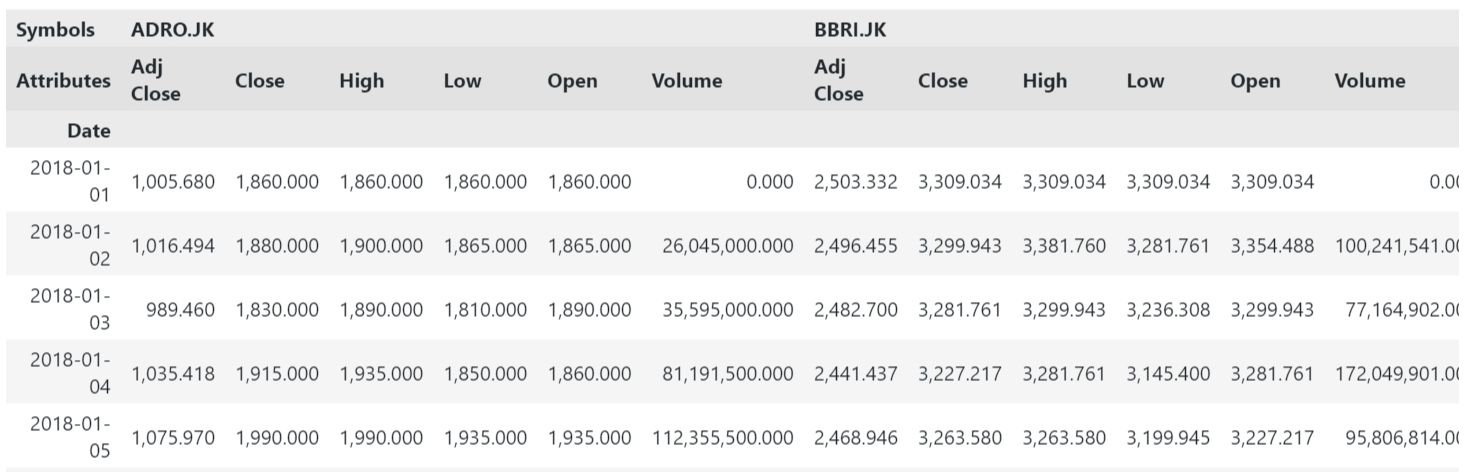

In [105]:
# code here 
# kode Pak Hadiat
c = stock.stack(level=0)
c.head()

C:\Users\ASANI\AppData\Local\Temp\ipykernel_15740\309034173.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  c = stock.stack(level=0)


Symbols                 ADRO.JK   BBRI.JK   TLKM.JK
Date       Attributes                              
2018-01-01 Adj Close    587.300 2,503.332 3,430.841
           Close      1,860.000 3,309.034 4,440.000
           High       1,860.000 3,309.034 4,440.000
           Low        1,860.000 3,309.034 4,440.000
           Open       1,860.000 3,309.034 4,440.000

In [106]:
c.unstack()

Symbols      ADRO.JK                                                          \
Attributes Adj Close     Close      High       Low      Open          Volume   
Date                                                                           
2018-01-01   587.300 1,860.000 1,860.000 1,860.000 1,860.000           0.000   
2018-01-02   593.615 1,880.000 1,900.000 1,865.000 1,865.000  26,045,000.000   
2018-01-03   577.828 1,830.000 1,890.000 1,810.000 1,890.000  35,595,000.000   
2018-01-04   604.667 1,915.000 1,935.000 1,850.000 1,860.000  81,191,500.000   
2018-01-05   628.348 1,990.000 1,990.000 1,935.000 1,935.000 112,355,500.000   
...              ...       ...       ...       ...       ...             ...   
2023-12-21 1,400.666 2,600.000 2,610.000 2,570.000 2,580.000  34,194,600.000   
2023-12-22 1,395.279 2,590.000 2,610.000 2,580.000 2,600.000  29,264,900.000   
2023-12-27 1,395.279 2,590.000 2,630.000 2,580.000 2,600.000  57,605,200.000   
2023-12-28 1,389.892 2,580.000 2,610.000 2,560.000 2,600.000  84,319,700.000   
2023-12-29 1,389.880 2,380.000 2,430.000 2,370.000 2,410.000 124,776,700.000   

Symbols      BBRI.JK                                                          \
Attributes Adj Close     Close      High       Low      Open          Volume   
Date                                                                           
2018-01-01 2,503.332 3,309.034 3,309.034 3,309.034 3,309.034           0.000   
2018-01-02 2,496.455 3,299.943 3,381.760 3,281.761 3,354.488 100,241,541.000   
2018-01-03 2,482.700 3,281.761 3,299.943 3,236.308 3,299.943  77,164,902.000   
2018-01-04 2,441.437 3,227.217 3,281.761 3,145.400 3,281.761 172,049,901.000   
2018-01-05 2,468.946 3,263.580 3,263.580 3,199.945 3,227.217  95,806,814.000   
...              ...       ...       ...       ...       ...             ...   
2023-12-21 5,291.497 5,575.000 5,600.000 5,525.000 5,550.000  99,049,600.000   
2023-12-22 5,386.412 5,675.000 5,700.000 5,600.000 5,650.000 109,411,300.000   
2023-12-27 5,338.955 5,625.000 5,725.000 5,625.000 5,700.000 122,236,700.000   
2023-12-28 5,433.869 5,725.000 5,750.000 5,675.000 5,700.000 121,434,600.000   
2023-12-29 5,433.869 5,725.000 5,750.000 5,675.000 5,750.000  93,126,000.000   

Symbols      TLKM.JK                                                          
Attributes Adj Close     Close      High       Low      Open          Volume  
Date                                                                          
2018-01-01 3,430.841 4,440.000 4,440.000 4,440.000 4,440.000           0.000  
2018-01-02 3,407.659 4,410.000 4,460.000 4,380.000 4,430.000  66,075,600.000  
2018-01-03 3,268.571 4,230.000 4,380.000 4,200.000 4,380.000 129,205,000.000  
2018-01-04 3,260.844 4,220.000 4,250.000 4,190.000 4,230.000  77,953,300.000  
2018-01-05 3,307.207 4,280.000 4,280.000 4,200.000 4,220.000  55,863,000.000  
...              ...       ...       ...       ...       ...             ...  
2023-12-21 3,722.551 3,950.000 3,970.000 3,930.000 3,960.000  48,242,100.000  
2023-12-22 3,731.975 3,960.000 3,980.000 3,950.000 3,980.000  28,222,700.000  
2023-12-27 3,713.127 3,940.000 4,000.000 3,920.000 3,990.000  73,157,200.000  
2023-12-28 3,731.975 3,960.000 3,970.000 3,940.000 3,960.000  34,024,400.000  
2023-12-29 3,722.551 3,950.000 3,980.000 3,940.000 3,960.000  27,497,600.000  

[1493 rows x 18 columns]

In [107]:
# kode Bu Jesslyn
stock_4=stock.stack(level=0)
stock_4.unstack(level=-1)

C:\Users\ASANI\AppData\Local\Temp\ipykernel_15740\668997557.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock_4=stock.stack(level=0)


Symbols      ADRO.JK                                                          \
Attributes Adj Close     Close      High       Low      Open          Volume   
Date                                                                           
2018-01-01   587.300 1,860.000 1,860.000 1,860.000 1,860.000           0.000   
2018-01-02   593.615 1,880.000 1,900.000 1,865.000 1,865.000  26,045,000.000   
2018-01-03   577.828 1,830.000 1,890.000 1,810.000 1,890.000  35,595,000.000   
2018-01-04   604.667 1,915.000 1,935.000 1,850.000 1,860.000  81,191,500.000   
2018-01-05   628.348 1,990.000 1,990.000 1,935.000 1,935.000 112,355,500.000   
...              ...       ...       ...       ...       ...             ...   
2023-12-21 1,400.666 2,600.000 2,610.000 2,570.000 2,580.000  34,194,600.000   
2023-12-22 1,395.279 2,590.000 2,610.000 2,580.000 2,600.000  29,264,900.000   
2023-12-27 1,395.279 2,590.000 2,630.000 2,580.000 2,600.000  57,605,200.000   
2023-12-28 1,389.892 2,580.000 2,610.000 2,560.000 2,600.000  84,319,700.000   
2023-12-29 1,389.880 2,380.000 2,430.000 2,370.000 2,410.000 124,776,700.000   

Symbols      BBRI.JK                                                          \
Attributes Adj Close     Close      High       Low      Open          Volume   
Date                                                                           
2018-01-01 2,503.332 3,309.034 3,309.034 3,309.034 3,309.034           0.000   
2018-01-02 2,496.455 3,299.943 3,381.760 3,281.761 3,354.488 100,241,541.000   
2018-01-03 2,482.700 3,281.761 3,299.943 3,236.308 3,299.943  77,164,902.000   
2018-01-04 2,441.437 3,227.217 3,281.761 3,145.400 3,281.761 172,049,901.000   
2018-01-05 2,468.946 3,263.580 3,263.580 3,199.945 3,227.217  95,806,814.000   
...              ...       ...       ...       ...       ...             ...   
2023-12-21 5,291.497 5,575.000 5,600.000 5,525.000 5,550.000  99,049,600.000   
2023-12-22 5,386.412 5,675.000 5,700.000 5,600.000 5,650.000 109,411,300.000   
2023-12-27 5,338.955 5,625.000 5,725.000 5,625.000 5,700.000 122,236,700.000   
2023-12-28 5,433.869 5,725.000 5,750.000 5,675.000 5,700.000 121,434,600.000   
2023-12-29 5,433.869 5,725.000 5,750.000 5,675.000 5,750.000  93,126,000.000   

Symbols      TLKM.JK                                                          
Attributes Adj Close     Close      High       Low      Open          Volume  
Date                                                                          
2018-01-01 3,430.841 4,440.000 4,440.000 4,440.000 4,440.000           0.000  
2018-01-02 3,407.659 4,410.000 4,460.000 4,380.000 4,430.000  66,075,600.000  
2018-01-03 3,268.571 4,230.000 4,380.000 4,200.000 4,380.000 129,205,000.000  
2018-01-04 3,260.844 4,220.000 4,250.000 4,190.000 4,230.000  77,953,300.000  
2018-01-05 3,307.207 4,280.000 4,280.000 4,200.000 4,220.000  55,863,000.000  
...              ...       ...       ...       ...       ...             ...  
2023-12-21 3,722.551 3,950.000 3,970.000 3,930.000 3,960.000  48,242,100.000  
2023-12-22 3,731.975 3,960.000 3,980.000 3,950.000 3,980.000  28,222,700.000  
2023-12-27 3,713.127 3,940.000 4,000.000 3,920.000 3,990.000  73,157,200.000  
2023-12-28 3,731.975 3,960.000 3,970.000 3,940.000 3,960.000  34,024,400.000  
2023-12-29 3,722.551 3,950.000 3,980.000 3,940.000 3,960.000  27,497,600.000  

[1493 rows x 18 columns]

2. Buatlah kolom baru pada data `stock` dengan nama `Price Range`. Kolom `Price Range` merupakan selisih dari kolom `High` dan kolom `Low`.

    💡 ***Hint***: 
    1. Gunakan `.stack()` untuk membuat hanya 1 level pada kolom `stock`.
    2. Buat kolom yang diminta.
    3. Gunakan `.unstack()` untuk mengembalikan data ke bentuk semula

In [108]:
stacked_stock.head()

Attributes          Adj Close     Close      High       Low      Open  \
Date       Symbols                                                      
2018-01-01 ADRO.JK    587.300 1,860.000 1,860.000 1,860.000 1,860.000   
           BBRI.JK  2,503.332 3,309.034 3,309.034 3,309.034 3,309.034   
           TLKM.JK  3,430.841 4,440.000 4,440.000 4,440.000 4,440.000   
2018-01-02 ADRO.JK    593.615 1,880.000 1,900.000 1,865.000 1,865.000   
           BBRI.JK  2,496.455 3,299.943 3,381.760 3,281.761 3,354.488   

Attributes                  Volume  
Date       Symbols                  
2018-01-01 ADRO.JK           0.000  
           BBRI.JK           0.000  
           TLKM.JK           0.000  
2018-01-02 ADRO.JK  26,045,000.000  
           BBRI.JK 100,241,541.000

In [109]:
# kode Bu Jeanice
stacked_stock['Price Range'] = stacked_stock['High']-stacked_stock['Low']
stacked_stock.unstack(level=1)

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   
...              ...       ...       ...       ...       ...       ...   
2023-12-21 1,400.666 5,291.497 3,722.551 2,600.000 5,575.000 3,950.000   
2023-12-22 1,395.279 5,386.412 3,731.975 2,590.000 5,675.000 3,960.000   
2023-12-27 1,395.279 5,338.955 3,713.127 2,590.000 5,625.000 3,940.000   
2023-12-28 1,389.892 5,433.869 3,731.975 2,580.000 5,725.000 3,960.000   
2023-12-29 1,389.880 5,433.869 3,722.551 2,380.000 5,725.000 3,950.000   

Attributes      High                           Low  ...                Open  \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK  ...   TLKM.JK   ADRO.JK   
Date                                                ...                       
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000  ... 4,440.000 1,860.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000  ... 4,380.000 1,865.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000  ... 4,200.000 1,890.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000  ... 4,190.000 1,860.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000  ... 4,200.000 1,935.000   
...              ...       ...       ...       ...  ...       ...       ...   
2023-12-21 2,610.000 5,600.000 3,970.000 2,570.000  ... 3,930.000 2,580.000   
2023-12-22 2,610.000 5,700.000 3,980.000 2,580.000  ... 3,950.000 2,600.000   
2023-12-27 2,630.000 5,725.000 4,000.000 2,580.000  ... 3,920.000 2,600.000   
2023-12-28 2,610.000 5,750.000 3,970.000 2,560.000  ... 3,940.000 2,600.000   
2023-12-29 2,430.000 5,750.000 3,980.000 2,370.000  ... 3,940.000 2,410.000   

Attributes                              Volume                  \
Symbols      BBRI.JK   TLKM.JK         ADRO.JK         BBRI.JK   
Date                                                             
2018-01-01 3,309.034 4,440.000           0.000           0.000   
2018-01-02 3,354.488 4,430.000  26,045,000.000 100,241,541.000   
2018-01-03 3,299.943 4,380.000  35,595,000.000  77,164,902.000   
2018-01-04 3,281.761 4,230.000  81,191,500.000 172,049,901.000   
2018-01-05 3,227.217 4,220.000 112,355,500.000  95,806,814.000   
...              ...       ...             ...             ...   
2023-12-21 5,550.000 3,960.000  34,194,600.000  99,049,600.000   
2023-12-22 5,650.000 3,980.000  29,264,900.000 109,411,300.000   
2023-12-27 5,700.000 3,990.000  57,605,200.000 122,236,700.000   
2023-12-28 5,700.000 3,960.000  84,319,700.000 121,434,600.000   
2023-12-29 5,750.000 3,960.000 124,776,700.000  93,126,000.000   

Attributes                 Price Range                  
Symbols            TLKM.JK     ADRO.JK BBRI.JK TLKM.JK  
Date                                                    
2018-01-01           0.000       0.000   0.000   0.000  
2018-01-02  66,075,600.000      35.000  99.998  80.000  
2018-01-03 129,205,000.000      80.000  63.635 180.000  
2018-01-04  77,953,300.000      85.000 136.361  60.000  
2018-01-05  55,863,000.000      55.000  63.635  80.000  
...                    ...         ...     ...     ...  
2023-12-21  48,242,100.000      40.000  75.000  40.000  
2023-12-22  28,222,700.000      30.000 100.000  30.000  
2023-12-27  73,157,200.000      50.000 100.000  80.000  
2023-12-28  34,024,400.000      50.000  75.000  30.000  
2023-12-29  27,497,600.000      60.000  75.000  40.000  

[1493 rows x 21 columns]

In [110]:
# code here

# 1. Copy data stock ke variabel stock_copy1
stock_copy1 = stock.copy()
stock_copy1.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

In [111]:
# 2. Lakukan stack pada stock_copy1 dan simpan pada stock_copy2
stock_copy2 = stock_copy1.stack()
stock_copy2.head()

C:\Users\ASANI\AppData\Local\Temp\ipykernel_15740\1784128141.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stock_copy2 = stock_copy1.stack()


Attributes          Adj Close     Close      High       Low      Open  \
Date       Symbols                                                      
2018-01-01 ADRO.JK    587.300 1,860.000 1,860.000 1,860.000 1,860.000   
           BBRI.JK  2,503.332 3,309.034 3,309.034 3,309.034 3,309.034   
           TLKM.JK  3,430.841 4,440.000 4,440.000 4,440.000 4,440.000   
2018-01-02 ADRO.JK    593.615 1,880.000 1,900.000 1,865.000 1,865.000   
           BBRI.JK  2,496.455 3,299.943 3,381.760 3,281.761 3,354.488   

Attributes                  Volume  
Date       Symbols                  
2018-01-01 ADRO.JK           0.000  
           BBRI.JK           0.000  
           TLKM.JK           0.000  
2018-01-02 ADRO.JK  26,045,000.000  
           BBRI.JK 100,241,541.000

In [112]:
# 3. Buat kolom Price Range pada stock_copy2
stock_copy2['Price Range'] = stock_copy2['High'] - stock_copy2['Low']
stock_copy2.head()

Attributes          Adj Close     Close      High       Low      Open  \
Date       Symbols                                                      
2018-01-01 ADRO.JK    587.300 1,860.000 1,860.000 1,860.000 1,860.000   
           BBRI.JK  2,503.332 3,309.034 3,309.034 3,309.034 3,309.034   
           TLKM.JK  3,430.841 4,440.000 4,440.000 4,440.000 4,440.000   
2018-01-02 ADRO.JK    593.615 1,880.000 1,900.000 1,865.000 1,865.000   
           BBRI.JK  2,496.455 3,299.943 3,381.760 3,281.761 3,354.488   

Attributes                  Volume  Price Range  
Date       Symbols                               
2018-01-01 ADRO.JK           0.000        0.000  
           BBRI.JK           0.000        0.000  
           TLKM.JK           0.000        0.000  
2018-01-02 ADRO.JK  26,045,000.000       35.000  
           BBRI.JK 100,241,541.000       99.998

In [113]:
# 4. Unstack stock_copy2
stock_copy2.unstack()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   
...              ...       ...       ...       ...       ...       ...   
2023-12-21 1,400.666 5,291.497 3,722.551 2,600.000 5,575.000 3,950.000   
2023-12-22 1,395.279 5,386.412 3,731.975 2,590.000 5,675.000 3,960.000   
2023-12-27 1,395.279 5,338.955 3,713.127 2,590.000 5,625.000 3,940.000   
2023-12-28 1,389.892 5,433.869 3,731.975 2,580.000 5,725.000 3,960.000   
2023-12-29 1,389.880 5,433.869 3,722.551 2,380.000 5,725.000 3,950.000   

Attributes      High                           Low  ...                Open  \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK  ...   TLKM.JK   ADRO.JK   
Date                                                ...                       
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000  ... 4,440.000 1,860.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000  ... 4,380.000 1,865.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000  ... 4,200.000 1,890.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000  ... 4,190.000 1,860.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000  ... 4,200.000 1,935.000   
...              ...       ...       ...       ...  ...       ...       ...   
2023-12-21 2,610.000 5,600.000 3,970.000 2,570.000  ... 3,930.000 2,580.000   
2023-12-22 2,610.000 5,700.000 3,980.000 2,580.000  ... 3,950.000 2,600.000   
2023-12-27 2,630.000 5,725.000 4,000.000 2,580.000  ... 3,920.000 2,600.000   
2023-12-28 2,610.000 5,750.000 3,970.000 2,560.000  ... 3,940.000 2,600.000   
2023-12-29 2,430.000 5,750.000 3,980.000 2,370.000  ... 3,940.000 2,410.000   

Attributes                              Volume                  \
Symbols      BBRI.JK   TLKM.JK         ADRO.JK         BBRI.JK   
Date                                                             
2018-01-01 3,309.034 4,440.000           0.000           0.000   
2018-01-02 3,354.488 4,430.000  26,045,000.000 100,241,541.000   
2018-01-03 3,299.943 4,380.000  35,595,000.000  77,164,902.000   
2018-01-04 3,281.761 4,230.000  81,191,500.000 172,049,901.000   
2018-01-05 3,227.217 4,220.000 112,355,500.000  95,806,814.000   
...              ...       ...             ...             ...   
2023-12-21 5,550.000 3,960.000  34,194,600.000  99,049,600.000   
2023-12-22 5,650.000 3,980.000  29,264,900.000 109,411,300.000   
2023-12-27 5,700.000 3,990.000  57,605,200.000 122,236,700.000   
2023-12-28 5,700.000 3,960.000  84,319,700.000 121,434,600.000   
2023-12-29 5,750.000 3,960.000 124,776,700.000  93,126,000.000   

Attributes                 Price Range                  
Symbols            TLKM.JK     ADRO.JK BBRI.JK TLKM.JK  
Date                                                    
2018-01-01           0.000       0.000   0.000   0.000  
2018-01-02  66,075,600.000      35.000  99.998  80.000  
2018-01-03 129,205,000.000      80.000  63.635 180.000  
2018-01-04  77,953,300.000      85.000 136.361  60.000  
2018-01-05  55,863,000.000      55.000  63.635  80.000  
...                    ...         ...     ...     ...  
2023-12-21  48,242,100.000      40.000  75.000  40.000  
2023-12-22  28,222,700.000      30.000 100.000  30.000  
2023-12-27  73,157,200.000      50.000 100.000  80.000  
2023-12-28  34,024,400.000      50.000  75.000  30.000  
2023-12-29  27,497,600.000      60.000  75.000  40.000  

[1493 rows x 21 columns]

## ✨`.melt()`✨

<center>
<img src="assets/reshaping_melt.png" width=60%/>
</center>

`DataFrame.melt()` digunakan untuk **melebur beberapa kolom menjadi 1 kolom dan nilai di dalamnya menjadi 1 kolom lainnya**.

**🔎 Parameter Penting Fungsi `.melt()`**

* `id_vars`: kolom yang akan dipertahankan, berperan sebagai _identifier_.
* `value_vars`: kolom yang akan dilebur.
* `var_name`: nama kolom untuk variabel.
* `value_name`: nama kolom untuk _value_.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html).

> ❓ Ambil semua detail yang berhubungan dengan perusahaan Adaro dan simpan pada variabel `adaro`.

In [114]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

In [115]:
# ambil semua detail untuk ADRO.JK

adaro = stock.xs(
    key = 'ADRO.JK',
    level = 1,
    axis = 1
)
adaro.head(2)

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-01,587.300,"1,860.000","1,860.000","1,860.000","1,860.000",0.000
2018-01-02,593.615,"1,880.000","1,900.000","1,865.000","1,865.000","26,045,000.000"


Gunakan fungsi `.melt()` untuk `adaro`.

In [116]:
adaro.melt()

,Attributes,value
0,Adj Close,587.300
1,Adj Close,593.615
2,Adj Close,577.828
3,Adj Close,604.667
4,Adj Close,628.348
...,...,...
8953,Volume,"34,194,600.000"
8954,Volume,"29,264,900.000"
8955,Volume,"57,605,200.000"
8956,Volume,"84,319,700.000"


Perhatikan bahwa setelah dilakukan *melting*, kita mendapatkan 2 kolom:

* Kolom `Attributes`: menyimpan nama-nama kolom yang di-*melt*.
* Kolom `value`: menyimpan nilai-nilai kolom yang di-*melt*.

> ❓ Setelah melakukan _melting_ di atas, detail tanggal pada data kita hilang **karena berperan sebagai indeks dari baris**. Bagaimana memunculkan tanggal walaupun sudah dilakukan _melting_?

In [117]:
# jadikan tanggal sebagai kolom biasa dengan fungsi .reset_index()
# piping dengan melakukan .melt()

adaro.reset_index().melt()

,Attributes,value
0,Date,2018-01-01 00:00:00
1,Date,2018-01-02 00:00:00
2,Date,2018-01-03 00:00:00
3,Date,2018-01-04 00:00:00
4,Date,2018-01-05 00:00:00
...,...,...
10446,Volume,"34,194,600.000"
10447,Volume,"29,264,900.000"
10448,Volume,"57,605,200.000"
10449,Volume,"84,319,700.000"


Setelah kita me-_reset_ _index_ dan melakukan _melting_ dengan fungsi `.melt()` tanpa mengatur argumen apapun, data `Date` kita juga ikut di-_melt_. Bentuk data di atas tidak terlalu kita inginkan. Oleh karena itu, kita akan mencoba untuk mengatur parameter pada `.melt()`.

### ▶️ Identifier dan Value

Terdapat 2 parameter pada `.melt()` yang sering digunakan:

* `id_vars`: kolom yang akan dipertahankan, berperan sebagai _identifier_.
* `value_vars`: kolom yang akan dilebur.

In [118]:
adaro.reset_index()

Attributes,Date,Adj Close,Close,High,Low,Open,Volume
0,2018-01-01,587.300,"1,860.000","1,860.000","1,860.000","1,860.000",0.000
1,2018-01-02,593.615,"1,880.000","1,900.000","1,865.000","1,865.000","26,045,000.000"
2,2018-01-03,577.828,"1,830.000","1,890.000","1,810.000","1,890.000","35,595,000.000"
3,2018-01-04,604.667,"1,915.000","1,935.000","1,850.000","1,860.000","81,191,500.000"
4,2018-01-05,628.348,"1,990.000","1,990.000","1,935.000","1,935.000","112,355,500.000"
...,...,...,...,...,...,...,...
1488,2023-12-21,"1,400.666","2,600.000","2,610.000","2,570.000","2,580.000","34,194,600.000"
1489,2023-12-22,"1,395.279","2,590.000","2,610.000","2,580.000","2,600.000","29,264,900.000"
1490,2023-12-27,"1,395.279","2,590.000","2,630.000","2,580.000","2,600.000","57,605,200.000"
1491,2023-12-28,"1,389.892","2,580.000","2,610.000","2,560.000","2,600.000","84,319,700.000"


In [119]:
# memunculkan tanggal, tetapi tanggal tidak di-melt: 
# 1. gunakan .reset_index()
# 2. gunakan .melt dan masukkan Date sebagai id_vars

adaro.reset_index().melt(id_vars = 'Date')

,Date,Attributes,value
0,2018-01-01,Adj Close,587.300
1,2018-01-02,Adj Close,593.615
2,2018-01-03,Adj Close,577.828
3,2018-01-04,Adj Close,604.667
4,2018-01-05,Adj Close,628.348
...,...,...,...
8953,2023-12-21,Volume,"34,194,600.000"
8954,2023-12-22,Volume,"29,264,900.000"
8955,2023-12-27,Volume,"57,605,200.000"
8956,2023-12-28,Volume,"84,319,700.000"


> ❓ Lakukan _melting_ hanya pada kolom `Open` dan `Close`. Kolom `Date` digunakan sebagai *identifier*.

In [120]:
adaro.reset_index().melt(id_vars = 'Date',
                         value_vars = ['Open','Close'])

,Date,Attributes,value
0,2018-01-01,Open,"1,860.000"
1,2018-01-02,Open,"1,865.000"
2,2018-01-03,Open,"1,890.000"
3,2018-01-04,Open,"1,860.000"
4,2018-01-05,Open,"1,935.000"
...,...,...,...
2981,2023-12-21,Close,"2,600.000"
2982,2023-12-22,Close,"2,590.000"
2983,2023-12-27,Close,"2,590.000"
2984,2023-12-28,Close,"2,580.000"


Kita dapat mengubah nama kolom `Attributes` (kolom yang menampung nama variabel) dengan parameter `var_name` dan mengubah nama kolom untuk *value* dengan parameter `value_name`.

> ❓ Melanjutkan pertanyaan sebelumnya, berikan nama untuk kolom variabel menjadi `Open and Close` dan nama untuk kolom _value_ menjadi `Price`. Simpan dalam variabel bernama `adaro_open_close`.

In [121]:
adaro.reset_index()

Attributes,Date,Adj Close,Close,High,Low,Open,Volume
0,2018-01-01,587.300,"1,860.000","1,860.000","1,860.000","1,860.000",0.000
1,2018-01-02,593.615,"1,880.000","1,900.000","1,865.000","1,865.000","26,045,000.000"
2,2018-01-03,577.828,"1,830.000","1,890.000","1,810.000","1,890.000","35,595,000.000"
3,2018-01-04,604.667,"1,915.000","1,935.000","1,850.000","1,860.000","81,191,500.000"
4,2018-01-05,628.348,"1,990.000","1,990.000","1,935.000","1,935.000","112,355,500.000"
...,...,...,...,...,...,...,...
1488,2023-12-21,"1,400.666","2,600.000","2,610.000","2,570.000","2,580.000","34,194,600.000"
1489,2023-12-22,"1,395.279","2,590.000","2,610.000","2,580.000","2,600.000","29,264,900.000"
1490,2023-12-27,"1,395.279","2,590.000","2,630.000","2,580.000","2,600.000","57,605,200.000"
1491,2023-12-28,"1,389.892","2,580.000","2,610.000","2,560.000","2,600.000","84,319,700.000"


In [122]:
adaro_open_close = adaro.reset_index().melt(id_vars = 'Date',
                                            value_vars = ['Open','Close'],
                                            var_name = "Open and Close",
                                            value_name = "Price")
adaro_open_close

,Date,Open and Close,Price
0,2018-01-01,Open,"1,860.000"
1,2018-01-02,Open,"1,865.000"
2,2018-01-03,Open,"1,890.000"
3,2018-01-04,Open,"1,860.000"
4,2018-01-05,Open,"1,935.000"
...,...,...,...
2981,2023-12-21,Close,"2,600.000"
2982,2023-12-22,Close,"2,590.000"
2983,2023-12-27,Close,"2,590.000"
2984,2023-12-28,Close,"2,580.000"


> ❓ Bagaimana mengurutkan `adaro_open_close` sehingga harga `Open` dan `Close` di hari yang sama dapat berdekatan?

In [123]:
adaro_open_close.head()

,Date,Open and Close,Price
0,2018-01-01,Open,"1,860.000"
1,2018-01-02,Open,"1,865.000"
2,2018-01-03,Open,"1,890.000"
3,2018-01-04,Open,"1,860.000"
4,2018-01-05,Open,"1,935.000"


In [124]:
adaro_open_close.sort_values(
    by = ['Date','Open and Close'],
    ascending = [True, False],
    ignore_index = True
)

,Date,Open and Close,Price
0,2018-01-01,Open,"1,860.000"
1,2018-01-01,Close,"1,860.000"
2,2018-01-02,Open,"1,865.000"
3,2018-01-02,Close,"1,880.000"
4,2018-01-03,Open,"1,890.000"
...,...,...,...
2981,2023-12-27,Close,"2,590.000"
2982,2023-12-28,Open,"2,600.000"
2983,2023-12-28,Close,"2,580.000"
2984,2023-12-29,Open,"2,410.000"


## ✨`.pivot()`✨

<center>
<img src="assets/reshaping_pivot.png" width=60%/>
</center>

`DataFrame.pivot()` merupakan kebalikan dari `DataFrame.melt()`.

**🔎 Parameter Penting Fungsi `.pivot()`**

* `columns`: kolom yang akan diuraikan.
* `index`: kolom yang dijadikan _index_/kolom mana yang tidak akan diuraikan.
* `values`: kolom yang akan mengisi _value_ dari kolom yang baru dibuat.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).

Mari lihat kembali bagaimana data `adaro_open_close` kita sebelumnya.

In [125]:
adaro_open_close.head()

# Open and Close --> kolom hasil melting yang menyimpan nama kolom yang dilebur
# Price --> kolom hasil melting yang menyimpan nilai dari kolom yang dilebur

,Date,Open and Close,Price
0,2018-01-01,Open,"1,860.000"
1,2018-01-02,Open,"1,865.000"
2,2018-01-03,Open,"1,890.000"
3,2018-01-04,Open,"1,860.000"
4,2018-01-05,Open,"1,935.000"


In [126]:
# menggunakan .pivot() pada data adaro_open_close
adaro_open_close.pivot(
    columns = 'Open and Close',
    values = 'Price',
    index = 'Date'
)

Open and Close,Close,Open
Date,,
2018-01-01,"1,860.000","1,860.000"
2018-01-02,"1,880.000","1,865.000"
2018-01-03,"1,830.000","1,890.000"
2018-01-04,"1,915.000","1,860.000"
2018-01-05,"1,990.000","1,935.000"
...,...,...
2023-12-21,"2,600.000","2,580.000"
2023-12-22,"2,590.000","2,600.000"
2023-12-27,"2,590.000","2,600.000"


Terlihat pada kode di atas, setelah kita menggunakan fungsi `.pivot()`:

* Kolom `Open and Close` akan dipecah menjadi 2 kolom: `Close` dan `Open`.
* Nilai pada kolom `Close` dan `Open` berasal dari kolom `Price`.

## 🧪 Knowledge Check: `.melt()` vs `.stack()`

Persamaan antara `melt()` dan `stack()`: 
- Sama-sama mengubah bentuk dataframe dari bentuk lebar (wide) ke bentuk panjang (long).

Apa perbedaan antara `melt()` dan `stack()` ?
- `stack()` = cara kerjanya hanya memindahkan level dari kolom menjadi baris.
- `melt()` = meleburkan beberapa kolom yang ada.

## 📝 Notes

**▶️ Perbedaan `.pivot_table()` dan `.pivot()`**
 
- `.pivot_table()` untuk membuat tabel agregasi (ada nilai yang dirangkum).
- `.pivot()` hanya untuk _reshaping_ (tidak ada nilai yang dirangkum).

**▶️ *Quick Summary***

- Melakukan *slicing* pada *dataframe* yang *multi-index*: 
    + Menggunakan fungsi `.xs()`.
- Melakukan *reshaping*:
    + *Wide to Long*:
       - Menggunakan fungsi `.stack()`: untuk *multi-index dataframe*.
         - Fungsi: memindahkan kolom jadi baris.
       - Menggunakan fungsi `.melt()`: untuk *single-index dataframe*.
         - Fungsi: melebur/menyatukan beberapa kolom.
    + *Long to Wide*:
       - Menggunakan fungsi `.unstack()`: untuk *multi-index dataframe*.
         - Fungsi: memindahkan baris jadi kolom.
       - Menggunakan fungsi `.pivot()`: untuk *single-index dataframe*.
         - Fungsi: menguraikan 1 kolom menjadi beberapa kolom.
- Mengubah *index* menjadi kolom:
    + Menggunakan fungsi `.reset_index()`.

---

# Visual Data Exploratory

🔎 **Tujuan Visualisasi**

- ***Exploratory***: proses  **mengeksplorasi data** untuk **mendapatkan sebuah _insight_**. Visualisasi yang ditampilkan biasanya sederhana. Analogi: mencari dan mendapatkan batu permata di antara ratusan batu biasa.
- ***Explanatory***: proses untuk menjelaskan atau **menyajikan _insight_** (*_explain_*) yang didapat dari hasil _exploratory_ kepada _user_/_audience_. Visualisasi yang ditampilkan biasanya lebih menarik dan meng-*highlight* _insight_ secara spesifik. Analogi: memoles batu permata tersebut dan menawarkannya kepada pembeli.

Pada _course_ ini, kita akan fokus pada cara menampilkan visualisasi data yang **informatif dan tepat** (*exploratory*). Untuk memperindah tampilan visualisasi dapat didalami secara mandiri melalui dokumentasi yang tersedia.

## ✨`pandas` dan `matplotlib`✨

`matplotlib` merupakan _package_ yang sering digunakan untuk membuat visualisasi data. Menariknya, kita dapat memanfaatkan fungsionalitas dari `matplotlib` melalui _method_ `.plot()` dari _dataframe_.

> ❓ Mbak Dwi sudah kembali dari agenda rapatnya. Sekarang, ia bersama Mas Arkana akan membuat  beberapa visualisasi yang akan dijadikan bahan diskusi dengan tim *data scientist* lainnya. Visualisasi pertama yang akan dibuat adalah pergerakan `Volume` dari ketiga perusahaan selama **50 hari terakhir**.

In [127]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

In [128]:
# 50 data Volume terakhir

stock['Volume'].tail(n=50)

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Date,,,
2023-10-19,"57,235,900.000",195831400,"62,296,900.000"
2023-10-20,"47,189,400.000",173353600,"38,978,200.000"
2023-10-23,"69,223,700.000",82756100,"69,428,400.000"
2023-10-24,"39,300,700.000",104021500,"67,041,700.000"
2023-10-25,"35,182,500.000",142215000,"89,567,900.000"
2023-10-26,"26,026,500.000",330618800,"141,139,700.000"
2023-10-27,"28,710,000.000",129599800,"99,607,000.000"
2023-10-30,"43,324,200.000",108523700,"82,945,500.000"
2023-10-31,"61,726,200.000",106760300,"66,801,600.000"


<Axes: xlabel='Date'>

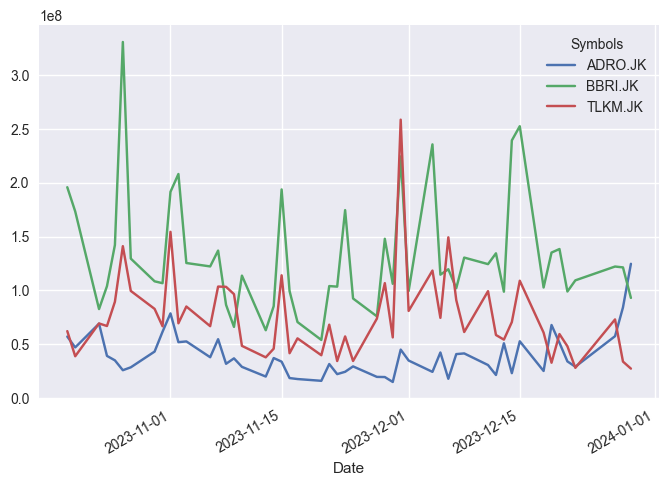

In [129]:
# membuat visualisasi dari 50 data Volume terakhir
stock['Volume'].tail(n=50).plot()

Dari visualisasi di atas:

* Sumbu x menunjukkan: nilai `Date`.
* Sumbu y menunjukkan: nilai `Volume`.
* Setiap garis mewakili perusahaan yang berbeda: `ADRO.JK`, `BBRI.JK`, dan `TLKM.JK`.    

Kita juga dapat mengatur _style_ dari visualisasi dengan fungsi `plt.style.use()`.

In [130]:
# style yang tersedia
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [131]:
# menggunakan style seaborn-v0_8

plt.style.use("seaborn-v0_8")

<Axes: xlabel='Date'>

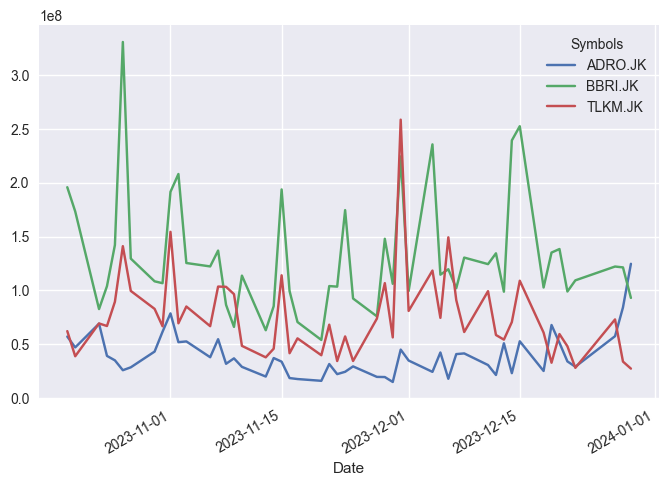

In [132]:
# visualisasi ulang setelah mengatur style

stock['Volume'].tail(n=50).plot()

***END OF DAY 2***

***START OF DAY 3***

> ❓ Ternyata berdasarkan visualisasi sebelumnya, `ADRO.JK` adalah saham dengan angka volume yang cenderung terendah dibandingkan dengan dua perusahaannya. Selanjutnya, Mbak Dwi dan Mas Arkana akan membuat visualisasi pergerakan saham `ADRO.JK` selama tahun 2023.

In [133]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

In [134]:
# subsetting untuk mendapatkan atribut ADRO.JK selama 2023

adaro_2023 = stock.xs(key = 'ADRO.JK',
                    level = 1,
                    axis = 1).loc['2023',:]

In [136]:
adaro_2023.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-12-21,"1,400.666","2,600.000","2,610.000","2,570.000","2,580.000","34,194,600.000"
2023-12-22,"1,395.279","2,590.000","2,610.000","2,580.000","2,600.000","29,264,900.000"
2023-12-27,"1,395.279","2,590.000","2,630.000","2,580.000","2,600.000","57,605,200.000"
2023-12-28,"1,389.892","2,580.000","2,610.000","2,560.000","2,600.000","84,319,700.000"
2023-12-29,"1,389.880","2,380.000","2,430.000","2,370.000","2,410.000","124,776,700.000"


<Axes: xlabel='Date'>

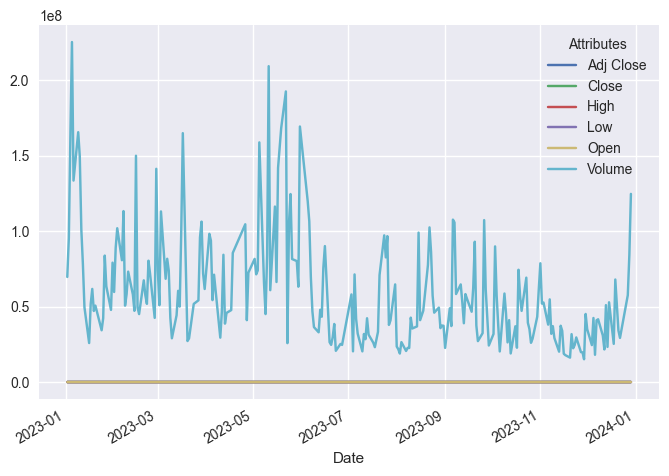

In [137]:
# visualisasi data adaro_2023

adaro_2023.plot()

💭 **Diskusi:** Apakah visualisasi tersebut sudah cukup informatif dan tepat?

In [138]:
# cek nilai maksimum untuk Volume
adaro_2023['Volume'].max()

225480200.0

In [139]:
# cek nilai maksimum untuk Open
adaro_2023['Open'].max()

3610.0

<Axes: xlabel='Date'>

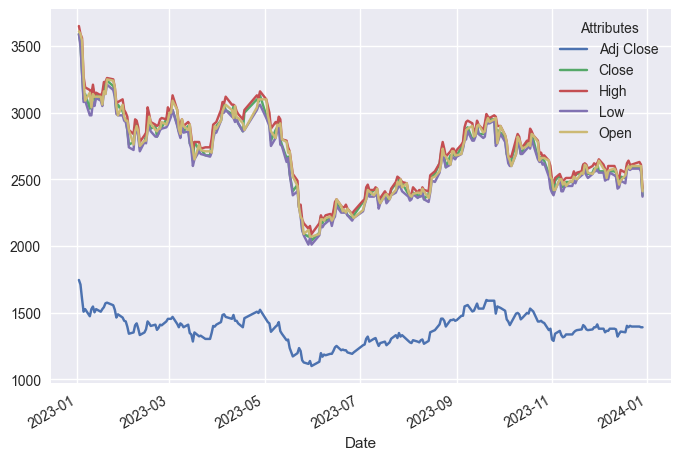

In [140]:
# buat visualisasi dengan meng-exclude kolom Volume
adaro_2023.drop(columns = 'Volume').plot()

📈 ***Insight***:

* ...

## ✨Tipe-Tipe Visualisasi✨

Perhatikan bahwa kita tidak memasukkan argumen apapun ke dalam fungsi `.plot()`. _By default_, jenis visualisasi yang digunakan adalah _lineplot_. Terdapat beberapa jenis visualisasi lain yang bisa kita gunakan.

* **Visualisasi untuk Satu Kolom**

    - Data kategorik:
        - **`.plot(kind='bar')` untuk _barplot_ (diagram batang)**.
        - **`.plot(kind='barh')` untuk _horizontal barplot_**.
        - **`.plot(kind='box')` untuk _boxplot_**.
        - `.plot(kind='pie')` untuk _pie chart_.
    
    - Data numerik:
        - **`.plot(kind='hist')` untuk histogram**.
        - `.plot(kind='density')` untuk *density plot*.
        - `.plot(kind='area')` untuk *area plot.*


* **Visualisasi untuk Dua Kolom**

    - `.plot(kind='scatter')` untuk _scatterplot_.
    - `.plot(kind='hexbin')` untuk _hexagonal binning plot_.

> 📌 Panduan untuk menentukan tipe visualisasi yang tepat: https://www.data-to-viz.com/.

> 📌 Dokumentasi fungsi `.plot()`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html.

### 1️⃣ Barplot

> 📌 **_Barplot_** digunakan untuk melihat **perbandingan** beberapa **kategori**.

In [141]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

> ❓ Selanjutnya, Mbak Dwi dan Mas Arkana ingin **membandingkan tingkat fluktuasi** nilai `High` pada masing-masing perusahaan menggunakan *coefficient of variation*. *Insight* yang didapatkan pada analisis ini dapat dimanfaatkan untuk mengurutkan perusahaan mana yang pergerakan sahamnya yang cukup stabil dan mana yang tidak.

> Semakin tinggi CoV, maka semakin tinggi tingkat fluktuasinya.

> 📌 Info lebih lanjut terkait [coefficient of variation](https://www.investopedia.com/terms/c/coefficientofvariation.asp)

$$CoV = \frac{std}{mean}$$

In [142]:
# mengambil nilai coefficient of variation
coef_of_var = stock['High'].std()/stock['High'].mean()
coef_of_var

Symbols
ADRO.JK   0.422
BBRI.JK   0.205
TLKM.JK   0.114
dtype: float64

<Axes: xlabel='Symbols'>

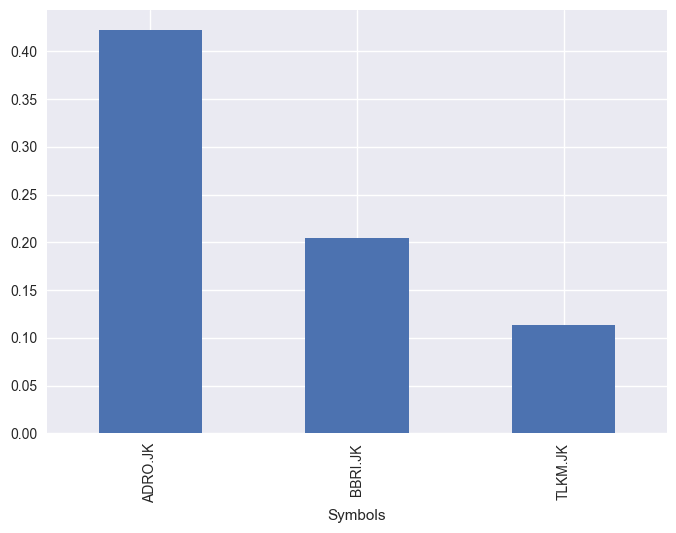

In [143]:
# membuat barplot 
coef_of_var.plot(kind = 'bar')

<Axes: xlabel='Symbols'>

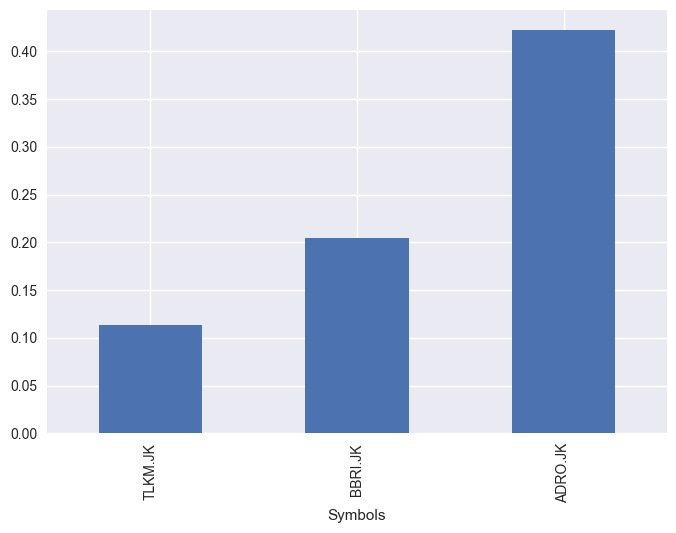

In [145]:
# tampilkan barplot secara berurutan: dari yang paling rendah ke yang paling tinggi

coef_of_var.sort_values(ascending=True).plot(kind = 'bar')

📈 ***Insight***:

* CoV paling besar: ADRO.JK. Harga High-nya fluktuasinya paling tinggi di antara perusahaan lainnya.
* CoV paling kecil: TLKM.JK. Harga High-nya fluktuasinya paling kecil di antara perusahaan lainnya. Relatif lebih stabil.

<Axes: title={'center': 'Perbandingan CoV High BRI, Telkom, dan Adaro'}, xlabel='Perusahaan', ylabel='CoV'>

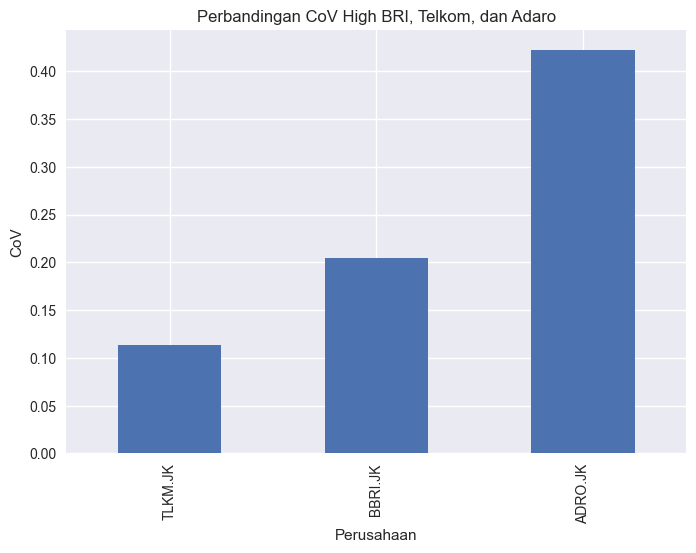

In [147]:
# parameter lain dari .plot()
coef_of_var.sort_values(ascending=True).plot(kind = 'bar',
                                             title = "Perbandingan CoV High BRI, Telkom, dan Adaro",
                                             xlabel = "Perusahaan",
                                             ylabel = "CoV")

### 2️⃣ Horizontal Barplot

> 📌 **_Horizontal barplot_** digunakan untuk melihat **perbandingan** beberapa **kategori secara horizontal** .

<Axes: ylabel='Symbols'>

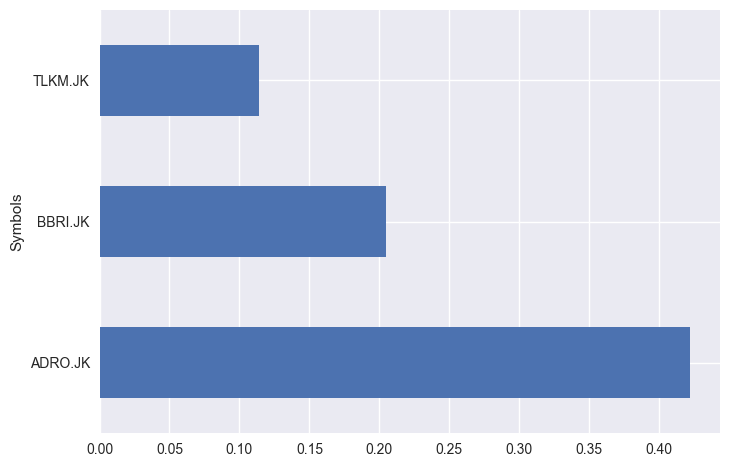

In [148]:
# membuat horizontal barplot dari data coef_of_var

coef_of_var.plot(kind = 'barh')

<Axes: ylabel='Symbols'>

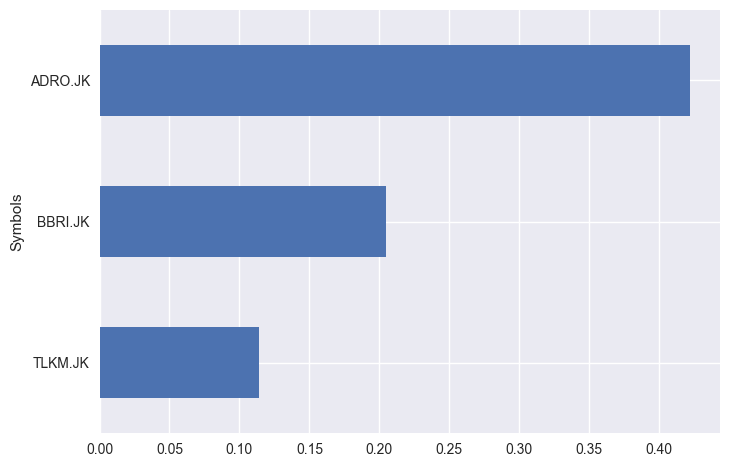

In [149]:
# tampilkan horizontal barplot secara berurutan: dari yang paling rendah ke yang paling tinggi
coef_of_var.sort_values(ascending=True).plot(kind = 'barh')

🔎 ***Barplot vs Horizontal Barplot***

* _Barplot_:  digunakan saat ingin membuat perbandingan yang sudah memiliki urutan, misalnya tingkat pendidikan dan waktu.
* _Horizontal barplot_: digunakan saat ingin melihat _ranking_.

> ❓ Dengan contoh di atas, kita sebaiknya menggunakan apa? Horizontal barplot.

### 3️⃣ Histogram

> 📌 **Histogram** digunakan untuk melihat **persebaran** data numerik.

>❓ Berdasarkan hasil analisis sebelumnya, `TLKM.JK` adalah perusahaan yang CoV-nya paling kecil dibandingkan BRI dan Adaro. Selanjutnya, mereka berdua ingin melihat lebih lanjut, bagaimanakah **persebaran** `Volume` pada saham `TLKM.JK`?

In [150]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,430.841 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,407.659 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,268.571 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,260.844 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,307.207 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

In [151]:
# ambil data Volume pada TLKM.JK dan simpan ke variabel vol_telkom
vol_telkom = stock['Volume']['TLKM.JK']
vol_telkom.head()

Date
2018-01-01             0.000
2018-01-02    66,075,600.000
2018-01-03   129,205,000.000
2018-01-04    77,953,300.000
2018-01-05    55,863,000.000
Name: TLKM.JK, dtype: float64

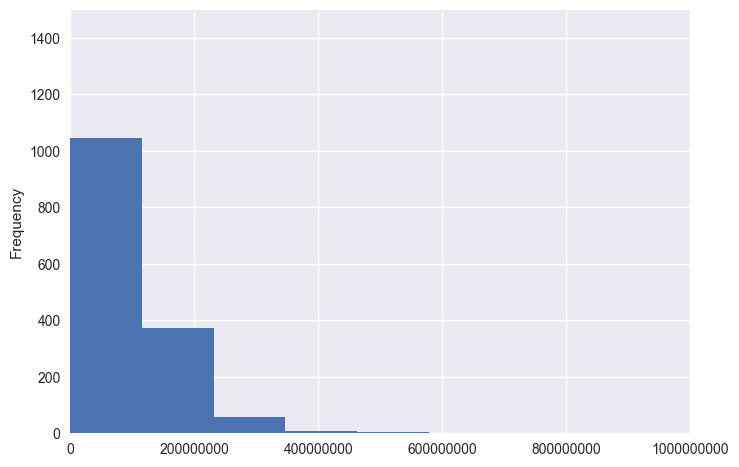

In [156]:
# visualisasi histogram 
vol_telkom.plot(kind = "hist",
                ylim = (0,1500), # ylim untuk mengatur range dari sumbu y
                xlim = (0,1e9)) # xlim untuk mengatur range dari sumbu x
plt.ticklabel_format(style = "plain", axis = "x") # mengganti style penulisan

📈 ***Insight***:

* Volume saham Telkom paling banyak diperjualbelikan di range 0-200 juta lembar. Kapan? Ada apa?

### 🧪 Knowledge Check: Barplot vs Histogram

Setelah mempelajari kedua jenis visualisasi di atas: _barplot_ dan histogram, apa perbedaan kedua visualisasi tersebut?

1. Variabel yang digunakan 
    * Barplot: kategorik dan numerik.
    * Histogram: numerik.
2. Bentuk
    * Barplot: batang sedikit berjarak.
    * Histogram: batang lebih rapat.
3. Kegunaan
    * Barplot: melihat ranking.
    * Histogram: melihat distribusi numerik.


### 4️⃣ Boxplot

> 📌 ***Boxplot*** digunakan untuk melihat ***5 number summary*** (min, Q1, Q2/median, Q3, max) & **membandingkan persebaran** dari beberapa kategori.

<center>
<img src="assets/boxplot.png" width="600"/>
<center/>

**Cara Membaca Informasi Dari Boxplot**
* Jika ada outlier di data kita, maka whisker menunjukkan batas outlier, yaitu Q1-1.5*IQR atau Q3+1.5*IQR (kalau titik di luar kumis (whisker)).
* Jika tidak ada outlier (tidak ada titik di luar kumis (whisker)), kumis (whisker) menunjukkan nilai minimum atau maximum dari data.

**Note**: Whisker ditunjukkan oleh area berwarna ungu.

**Bagian-Bagian dari Boxplot**

- Q1: kuartil 1 (data ke 25%).
- Median: kuartil 2 (data ke 50%).
- Q3: kuartil 3 (data ke 75%).
- _Lower whisker_: pagar bawah.
- _Upper whisker_: pagar atas.
- Data di luar pagar akan dianggap sebagai _outlier_ atau data pencilan.

> ⚠️ _Lower whisker_ bukan nilai minimum data. _Upper whisker_ juga bukan nilai maksimum data.

**💡 Tips: Informasi yang Bisa Didapatkan dari *Boxplot***

1. Garis kuning pada kotak, menunjukkan nilai tengah atau median pada data.
2. Letak garis median menunjukkan persebaran data.
    * Jika letak garis median tepat di tengah kotak, maka banyak nilai-nilai yang kecil dan banyak nilai-nilai yang besar adalah sama.
    * Jika letak garis median mendekati garis Q1, kebanyakan nilai-nilai pada data adalah nilai yang kecil.
    * Jika letak garis median mendekati garis Q2, kebanyakan nilai-nilai pada data adalah nilai yang besar.
3. Lebar kotak menunjukkan tingkat variasi
    * Semakin panjang kotak, semakin bervariasi nilai pada data.
4. Titik-titik di luar *whiskers* menunjukkan data pencilan.
    * Data pencilan adalah data yang < Q1-1.5*IQR atau >Q3+1.5*IQR

> ❓ Untuk mendapatkan *insight* yang lebih lengkap, Mbak Dwi dan Mas Arkana **membandingkan persebaran nilai volume** untuk ketiga saham menggunakan *boxplot*.

In [157]:
stock['Volume'].head()

Symbols,ADRO.JK,BBRI.JK,TLKM.JK
Date,,,
2018-01-01,0.000,0,0.000
2018-01-02,"26,045,000.000",100241541,"66,075,600.000"
2018-01-03,"35,595,000.000",77164902,"129,205,000.000"
2018-01-04,"81,191,500.000",172049901,"77,953,300.000"
2018-01-05,"112,355,500.000",95806814,"55,863,000.000"


<Axes: >

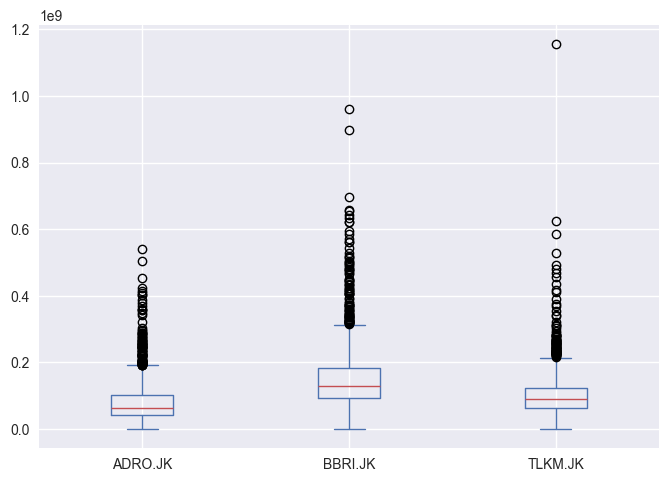

In [158]:
# menampilan boxplot untuk membandingkan persebaran Volume dari ketiga saham

stock['Volume'].plot(kind = 'box')

Gunakan parameter `vert=False` untuk melihat _boxplot_ secara horizontal.

<Axes: >

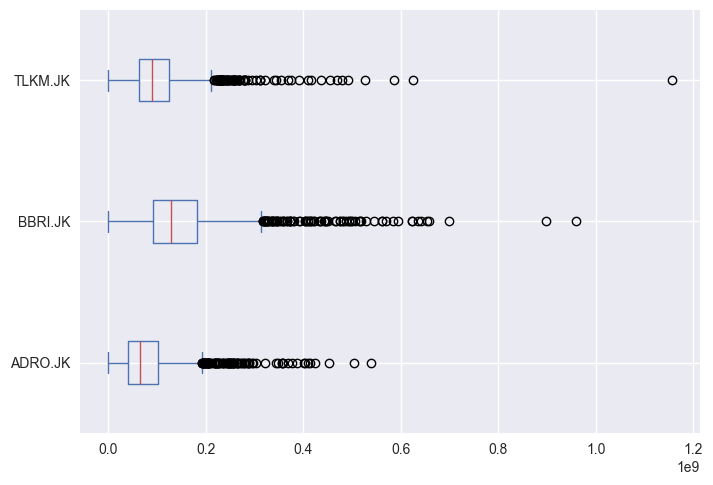

In [159]:
stock['Volume'].plot(kind = 'box', vert=False)

📈 ***Insight***:

* Insight dari median (terkait pusat data): BBRI.JK memiliki median yang paling tinggi dibandingkan 2 perusahaan lainnya.
* Insight dari lebar kotak (terkait variasi data): BBRI.JK memiliki variasi nilai volume yang bervariasi dibandingkan 2 perusahaan lainnya.

Selain menggunakan `.plot(kind = "box")`, kita juga bisa menggunakan fungsi `.boxplot()` untuk membuat *boxplot*,

> ❓ Di tengah pengerjaan analisis perbandingan saham ini, Mbak Dwi mendapatkan *request* untuk membandingkan `Volume` dari `BBRI.JK` setiap kuater tahun 2023. Bantulah Mbak Dwi untuk memenuhi *request* tersebut!

In [162]:
# ambil data Volume BBRI.JK

vol_bri = stock['Volume'][['BBRI.JK']]
vol_bri.head()

Symbols,BBRI.JK
Date,
2018-01-01,0
2018-01-02,100241541
2018-01-03,77164902
2018-01-04,172049901
2018-01-05,95806814


In [163]:
# slicing hanya tahun 2023
vol_bri_2023 = vol_bri.loc['2023',:]
vol_bri_2023.head()

Symbols,BBRI.JK
Date,
2023-01-02,100200100
2023-01-03,95136500
2023-01-04,188071000
2023-01-05,292142000
2023-01-06,175932000


In [166]:
# buat kolom baru, Quarter, yang menunjukkan kuarter dari waktu yang diberikan 

vol_bri_2023['Quarter'] = vol_bri_2023.index.to_period('Q')
vol_bri_2023.head()

Symbols,BBRI.JK,Quarter
Date,,
2023-01-02,100200100,2023Q1
2023-01-03,95136500,2023Q1
2023-01-04,188071000,2023Q1
2023-01-05,292142000,2023Q1
2023-01-06,175932000,2023Q1


In [167]:
# nilai unique  Quarter
vol_bri_2023['Quarter'].unique()

<PeriodArray>
['2023Q1', '2023Q2', '2023Q3', '2023Q4']
Length: 4, dtype: period[Q-DEC]

<Axes: title={'center': 'BBRI.JK'}, xlabel='[Quarter]'>

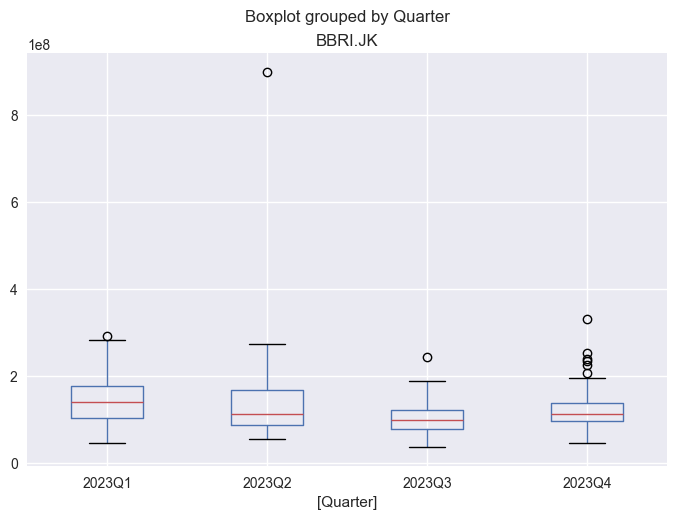

In [168]:
# visualisasi
vol_bri_2023.boxplot(by = 'Quarter')

### (Additional) Other Python Libraries for Visualization

Apabila Anda tertarik mengenai visualisasi di Python, silakan eksplorasi lebih lanjut _package_-_package_ berikut.

- `matplotlib`: semua elemen pada visualisasi dapat dikustomisasi, namun membutuhkan _code_ yang lebih panjang. [Dokumentasi Matplotlib](https://matplotlib.org/3.2.2/tutorials/index.html) 
- `seaborn`: dikembangkan dari `matplotlib`. Lebih sedikit yang dapat dikustomisasi, namun lebih mudah. [Dokumentasi Seaborn](https://seaborn.pydata.org/introduction.html)
- `plotly`: plot interaktif serta kompatibilitas dengan bahasa lain yang tinggi. [Dokumentasi Plotly](https://plotly.com/python/)
- `altair`: plot interaktif yang bersifat deklaratif dan _code_ relatif lebih mudah. [Dokumentasi Altair](https://altair-viz.github.io/index.html)

Referensi perbandingan _library_ dapat Anda lihat [di sini](https://askalgo-py.netlify.app/faq/dwv#adakah-library-visualisasi-data-di-python-selain-matplotlib).

***END OF DAY 3***

---

***START OF DAY 4***

# Using Group By Effectively

Teknik yang tidak kalah penting adalah operasi ***group by***. Mungkin untuk Anda yang sudah pernah menggunakan SQL atau _tools_ lain seperti `tidyverse` pada bahasa pemrograman R akan familiar dengan operasi _group by_ ini.

Misalkan kita punya *dataframe* `close_melted` yang menyimpan data `Close` harian dari setiap perusahaan.

In [ ]:
stock.head()

In [ ]:
stock['Close'].head()

In [ ]:
# membuat dataframe close_melted
close_melted  = stock['Close'].reset_index().melt(
    id_vars = 'Date',
    value_name = "Close",
    var_name = "Perusahaan"
)
close_melted

> ❓ Untuk melengkapi analisis sebelumnya, Mbak Dwi dan Mas Arkana ingin melihat, di antara ADRO.JK, BBRI.JK, TLKM.JK, manakah saham yang memiliki **rata-rata** `Close` harian tertinggi? 

Untuk menyelesaikan *case* di atas, kita perlu membuat tabel agregasi terlebih dahulu. Buatlah tabel agregasi dengan `.crosstab()` atau `.pivot_table()`!

▶️ Dengan `.crosstab()`

In [ ]:
# dengan crosstab 


▶️ Dengan `.pivot_table()`

In [ ]:
# dengan pivot_table


Perbedaan antara `crosstab` dan `pivot_table` dapat dirangkum dalam tabel berikut:

|                                                                                    | `.crosstab()` | `.pivot_table()` |
|------------------------------------------------------------------------------------|-----------------|--------------------|
|                                                                          **Input** | Array of values/Series |          DataFrame (parameter `data`)|
|                                                              **Default `aggfunc`** |       `'count'` |           `'mean'` |
|                                                          **Parameter `columns`** |       Mandatory |      Optional |
|                                                          **Parameter `normalize`** |       Available |      Not Available |
| [**Computation Time**](https://ramiro.org/notebook/pandas-crosstab-groupby-pivot/) | Relatively Slower |  Relatively Faster |

▶️ Dengan `.groupby()`

Selain menggunakan `pd.crosstab()` atau `.pivot_table`, salah satu fungsi yang dapat dimanfaatkan untuk melakukan agregasi data adalah method `.groupby()`.

Proses agregasi dengan `.groupby()` merupakan gabungan dari proses:

1. ***Split***: memisahkan baris berdasarkan suatu kategori.
2. ***Apply***: menerapkan fungsi agregasi untuk masing-masing grup.
3. ***Combine***: mengembalikan hasil dalam bentuk 1 tabel.

```python
df.groupby('kolom_category').aggfunc()
```

atau

```python
df.groupby('kolom_category')['kolom_numerik'].aggfunc()
```

💡 Berikut beberapa fungsi agregasi yang dapat digunakan pada `pandas`:

- `.count()`- jumlah baris
- `.sum()` - penjumlahan
- `.mean()` - rata-rata 
- `.median()` - median
- `.min()` - minimum
- `.max()` - maximum
- `.mode()` - modus
- `.std()` - standard deviasi
- `.var()`- variansi

In [ ]:
# dengan groupby


Selanjutnya, buat visualisasi dengan *barchart*.

## ✨Grouped Barchart✨

> ❓ Jika pada analisis sebelumnya Mbak Dwi dan Mas Arkana hanya menghitung rata-rata nilai `Close` secara keseluruhan, kali ini, mereka ingin membuat visualisasi yang dapat membandingkan rata-rata nilai `Close` untu ketiga saham setiap bulannya. 

Untuk *case* di atas, kita bisa menggunakan ***grouped barchart***.

* Buatlah *dataframe*  `closing_price` yang berisikan nilai `Close` untuk ketiga saham.
* Tampilkan nilai rata-rata `Close` untuk setiap bulannya pada tabel agregasi `mean_closing`.

In [ ]:
# buat dataframe closing_price
closing_price = 
closing_price.head()

In [ ]:
# buat kolom baru pada closing_price: Month
closing_price['Month'] = 

In [ ]:
closing_price.head()

In [ ]:
# buat tabel agregasi mean_closing
mean_closing = 
mean_closing

Selanjutnya, kita akan membuat *grouped barchart*.

In [ ]:
# improvement visualisasi
# perbaiki urutan bulan
months = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']



### 🧪 Knowledge Check: `.groupby()`

Misalkan Anda dihadapkan dengan *long dataframe* seperti pada `closingprice_melt` berikut.

In [ ]:
closingprice_melt = closing_price.melt(id_vars='Month', value_name='Close')
closingprice_melt

In [ ]:
mean_closing.head()

🧐 Bagaimana cara kita mengubah bentuk `closingprice_melt` menjadi `mean_closing`?

***Hint:*** Gunakan teknik _group by_ dan juga _reshaping_.

In [ ]:
# code here


## ✨Combining `.agg()` and `.groupby()`✨

Pada bagian sebelumnya, kita sudah mengetahui bahwa penggunaan `.groupby()` diikuti dengan sebuah fungsi agregasi. Misalnya, jika ingin menghitung rata-rata, maka kita menggunakan `.mean()`. Terdapat fungsi lain, `.agg()` yang memungkinkan kita untuk menggunakan fungsi agregasi yang berbeda-beda.

Misalkan terdapat memiliki data `stock_long` sebagai berikut.

In [ ]:
stock_long = stock.stack().reset_index()
stock_long.head()

❓ Jika pada analisis sebelumnya Mbak Dwi dan Mas Arkana hanya terfokus pada satu kolom, kali ini, mereka ingin membandingkan beberapa aspek berikut dari ketiga perusahaan:

- Harga maksimum dari `High` untuk ketiga perusahaan (`max` dari `High`)
- Harga minimum dari `Low` untuk ketiga perusahaan  (`min` dari `Low`)
- Rata-rata *closing price* untuk ketiga perusahaan (`mean` dari `Close`)

Untuk mendapat hasil tersebut, kita harus melakukan _chaining_ `.groupby()` dengan method `.agg()`. Kita harus menyertakan _mapping_ (*dictionary*) untuk setiap kolom dengan fungsi agregasinya seperti berikut ini.

In [ ]:
# dengan .groupby()
# dictionary {key : value}

summary_stock = stock_long.groupby(by='Symbols').agg({
    'High':'max',
    'Low':'min',
    'Close':'mean'
})
summary_stock

Visualisasikan tabel agregasi di atas untuk membandingkan nilai tersebut.

In [ ]:
# visualisasi


## 🧪 Knowledge Check: Visualization

Perhatikan _dataframe_ `monthly_closing` berikut.

In [ ]:
stock['YearMonth'] = stock.index.to_period('M')
monthly_closing = stock.groupby('YearMonth').mean()['Close']
monthly_closing.head()

Tipe plot mana yang paling sesuai untuk data di atas, apabila kita ingin melihat pergerakan nilai `Close` dari waktu ke waktu?

- [ ] _Line plot_ `.plot()`
- [ ] _Scatter plot_ `.plot.scatter(x, y)` 
- [ ] _Bar plot_ `.plot.bar()` 
- [ ] _Box plot_ `.plot.box()` 

---

# Referensi

* Dokumentasi per Fungsi 
    * [Dokumentasi `.xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html)
    * [Dokumentasi `.stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html)
    * [Dokumentasi `.unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)
    * [Dokumentasi `.pivot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)
    * [Dokumentasi `.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
* Dokumentasi Resmi
    * [Pandas](https://pandas.pydata.org/)
    * [Matplotlib](https://matplotlib.org/)
    * [Seaborn](https://seaborn.pydata.org/)
    * [Plotly](https://plotly.com/)
    * [Altair](https://altair-viz.github.io/)
* From Algoritma
    * [AskAlgo Python](https://askalgo-py.netlify.app/)

# Inclass Questions

* **Q: Fungsi `.xs()` apakah bisa mengambil data tertentu, seperti ADRO.JK hanya High dan Low, BBRI.JK hanya High, Low, dan Close dalam sekali `.xs()`? Apakah subsetting dengan `[]` ada kelebihannya dibanding `.xs()`?**

Sayangnya, tidak sepenuhnya bisa. Fungsi `.xs()` hanya memungkinkan pengambilan data berdasarkan satu level indeks pada satu waktu. Jika kita ingin memilih kombinasi spesifik dari beberapa level, seperti ADRO.JK dan BBRI.JK dengan kolom tertentu, diperlukan beberapa pemanggilan `.xs()` dan penggabungan hasilnya.
 
Dengan **`loc`**, kita bisa langsung memilih kolom spesifik dalam satu langkah dengan lebih sederhana dan fleksibel.

**Contoh Kode**:
```python
stock.loc[:, [
    ('ADRO.JK', 'High'),
    ('ADRO.JK', 'Low'),
    ('BBRI.JK', 'High'),
    ('BBRI.JK', 'Low'),
    ('BBRI.JK', 'Close')
]]
```  
Kode ini lebih efisien dibandingkan menggunakan `.xs()` berkali-kali.

In [44]:
stock.loc[:,[('High','ADRO.JK'),
             ('Low','ADRO.JK'),
             ('High','BBRI.JK'),
             ('Low','BBRI.JK'),
             ('Close','BBRI.JK')]]

Attributes,High,Low,High,Low,Close
Symbols,ADRO.JK,ADRO.JK,BBRI.JK,BBRI.JK,BBRI.JK
Date,,,,,
2018-01-01,"1,860.000","1,860.000","3,309.034","3,309.034","3,309.034"
2018-01-02,"1,900.000","1,865.000","3,381.760","3,281.761","3,299.943"
2018-01-03,"1,890.000","1,810.000","3,299.943","3,236.308","3,281.761"
2018-01-04,"1,935.000","1,850.000","3,281.761","3,145.400","3,227.217"
2018-01-05,"1,990.000","1,935.000","3,263.580","3,199.945","3,263.580"
...,...,...,...,...,...
2023-12-21,"2,610.000","2,570.000","5,600.000","5,525.000","5,575.000"
2023-12-22,"2,610.000","2,580.000","5,700.000","5,600.000","5,675.000"
